# Capstone Project 1(Credit Card Approval)

1. Why is your proposal important in today's world? How predicting a good client is worthy for a bank?
- In today's highly competitive banking sector, accurate credit card approval predictions are crucial for minimizing risks and maximizing profits. By identifying creditworthy clients, banks can reduce default rates and improve their overall portfolio quality.

2. How is it going to impact the banking sector?
- Implementing an effective credit card approval prediction system can significantly impact the banking sector by:
    1. Reducing default rates and associated losses.
    2. Enhancing customer satisfaction by providing credit cards to deserving applicants.
    3. Optimizing resource allocation for credit assessment.
    4. Complying with regulatory requirements for responsible lending.


3. If any, what is the gap in the knowledge or how your proposed method can be helpful if required in the future for any bank in India.
- We're exploring whether there are opportunities to enhance the current methods banks use to evaluate credit card applications. Sometimes, banks might overlook essential information that could influence approval decisions. Our project aims to address these gaps and offer a method that could potentially be valuable for any bank, adapting to changes in the banking landscape.

# Problem Statement

- The aim of this analysis is to predict whether a customer's credit card application will be approved or rejected. The dataset includes various customer attributes, such as demographic details, financial information, and employment history. The goal is to develop a predictive model that accurately classifies whether a credit card application will be approved (label = 0) or rejected (label = 1) based on the provided features.

# Hypotheses



- Income and Financial Stability: Customers with higher annual incomes (Annual_income) might be more likely to have their credit card applications approved. Financial stability could play a significant role in the approval decision.

- Employment and Occupation: Employment stability, indicated by the length of employment (Employed_days), could influence the approval decision. Certain types of occupations (Type_Occupation) might be viewed as more secure, increasing the likelihood of application approval.
     
- Education and Professional Status: Higher education levels (EDUCATION) might be associated with higher approval rates, as educated individuals might be considered more creditworthy. Professional or managerial roles could also influence approval decisions.

- Marital and Family Status: Marital status (Marital_status) and family size (Family_Members) could impact an individual's financial stability and creditworthiness, influencing application approval.

- Age and Birthday Count: Age-related features, such as Birthday_count, could provide insights into the applicant's age. Older applicants might have higher approval rates due to more established financial histories.

- Gender and Dependents: While gender might not be a primary factor, the presence of dependents (CHILDREN) could impact an applicant's disposable income, potentially influencing application approval.

- Property Ownership: Property ownership (Propert_Owner) could indicate financial stability and the ability to meet credit card obligations, potentially increasing the likelihood of application approval.

- Type of Income: The type of income (Type_Income) might impact application approval. More stable income sources could positively influence the decision.

- Housing Type: Housing type (Housing_type) might provide insights into the applicant's financial stability and capacity to manage credit card obligations, influencing application approval.

# 1. Data Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

credit_card_raw=pd.read_csv('capstone project 1.csv')

credit_card=credit_card_raw.copy()

credit_card

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0     5008827      M         Y             Y         0       180000.0   
1     5009744      F         Y             N         0       315000.0   
2     5009746      F         Y             N         0       315000.0   
3     5009749      F         Y             N         0            NaN   
4     5009752      F         Y             N         0       315000.0   
...       ...    ...       ...           ...       ...            ...   
1543  5028645      F         N             Y         0            NaN   
1544  5023655      F         N             N         0       225000.0   
1545  5115992      M         Y             Y         2       180000.0   
1546  5118219      M         Y             N         0       270000.0   
1547  5053790      F         Y             Y         0       225000.0   

               Type_Income                      EDUCATION  \
0                Pensioner               Higher education   
1     Commercial associate               Higher education   
2     Commercial associate               Higher education   
3     Commercial associate               Higher education   
4     Commercial associate               Higher education   
...                    ...                            ...   
1543  Commercial associate               Higher education   
1544  Commercial associate              Incomplete higher   
1545               Working               Higher education   
1546               Working  Secondary / secondary special   
1547               Working               Higher education   

            Marital_status       Housing_type  Birthday_count  Employed_days  \
0                  Married  House / apartment        -18772.0         365243   
1                  Married  House / apartment        -13557.0           -586   
2                  Married  House / apartment             NaN           -586   
3                  Married  House / apartment        -13557.0           -586   
4                  Married  House / apartment        -13557.0           -586   
...                    ...                ...             ...            ...   
1543               Married  House / apartment        -11957.0          -2182   
1544  Single / not married  House / apartment        -10229.0          -1209   
1545               Married  House / apartment        -13174.0          -2477   
1546        Civil marriage  House / apartment        -15292.0           -645   
1547               Married  House / apartment        -16601.0          -2859   

      Mobile_phone  Work_Phone  Phone  EMAIL_ID Type_Occupation  \
0                1           0      0         0             NaN   
1                1           1      1         0             NaN   
2                1           1      1         0             NaN   
3                1           1      1         0             NaN   
4                1           1      1         0             NaN   
...            ...         ...    ...       ...             ...   
1543             1           0      0         0        Managers   
1544             1           0      0         0     Accountants   
1545             1           0      0         0        Managers   
1546             1           1      1         0         Drivers   
1547             1           0      0         0             NaN   

      Family_Members  Unnamed: 18  label  
0                  2          NaN      1  
1                  2          NaN      1  
2                  2          NaN      1  
3                  2          NaN      1  
4                  2          NaN      1  
...              ...          ...    ...  
1543               2          NaN      0  
1544               1          NaN      0  
1545               4          NaN      0  
1546               2          NaN      0  
1547               2          NaN      0  

[1548 rows x 20 columns]

In [2]:
# Display the dimensions (rows, columns) of the credit_card Dataset
credit_card_shape = credit_card.shape
print("Shape of credit_card DataFrame:", credit_card_shape)

Shape of credit_card DataFrame: (1548, 20)


In [3]:
# Display the total number of elements in the credit_card Dataset
credit_card_size = credit_card.size
print("Total elements in credit_card DataFrame:", credit_card_size)

Total elements in credit_card DataFrame: 30960


- The dataset "credit_card" contains a total of 1548 records, each comprising 20 attributes. With a size of 30960 data points, this dataset provides a comprehensive view of individuals' attributes, enabling insightful analysis into credit card behavior, financial profiles, and decision-making patterns.

In [4]:
#Checking all the features
credit_card.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'Unnamed: 18', 'label'],
      dtype='object')

In [5]:
# Display concise summary information about the credit_card Dataset
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

- The dataset comprises 1548 entries, each corresponding to an individual's credit-related information. It features 20 columns, representing diverse attributes such as gender, income, education, and more. The data types include integers, floats, and objects (strings), implying both numerical and categorical information. Notably, columns such as GENDER, Annual_income, Birthday_count, and Type_Occupation have missing values, denoted as "NaN".

In [6]:
# Display a summary statistics table for all columns in the credit_card DataFrame, including categorical variables
credit_card.describe(include='all')

Ind_ID GENDER Car_Owner Propert_Owner     CHILDREN  \
count   1.548000e+03   1541      1548          1548  1548.000000   
unique           NaN      2         2             2          NaN   
top              NaN      F         N             Y          NaN   
freq             NaN    973       924          1010          NaN   
mean    5.078920e+06    NaN       NaN           NaN     0.412791   
std     4.171759e+04    NaN       NaN           NaN     0.776691   
min     5.008827e+06    NaN       NaN           NaN     0.000000   
25%     5.045070e+06    NaN       NaN           NaN     0.000000   
50%     5.078842e+06    NaN       NaN           NaN     0.000000   
75%     5.115673e+06    NaN       NaN           NaN     1.000000   
max     5.150412e+06    NaN       NaN           NaN    14.000000   

        Annual_income Type_Income                      EDUCATION  \
count    1.525000e+03        1548                           1548   
unique            NaN           4                              5   
top               NaN     Working  Secondary / secondary special   
freq              NaN         798                           1031   
mean     1.913993e+05         NaN                            NaN   
std      1.132530e+05         NaN                            NaN   
min      3.375000e+04         NaN                            NaN   
25%      1.215000e+05         NaN                            NaN   
50%      1.665000e+05         NaN                            NaN   
75%      2.250000e+05         NaN                            NaN   
max      1.575000e+06         NaN                            NaN   

       Marital_status       Housing_type  Birthday_count  Employed_days  \
count            1548               1548     1526.000000    1548.000000   
unique              5                  6             NaN            NaN   
top           Married  House / apartment             NaN            NaN   
freq             1049               1380             NaN            NaN   
mean              NaN                NaN   -16040.342071   59364.689922   
std               NaN                NaN     4229.503202  137808.062701   
min               NaN                NaN   -24946.000000  -14887.000000   
25%               NaN                NaN   -19553.000000   -3174.500000   
50%               NaN                NaN   -15661.500000   -1565.000000   
75%               NaN                NaN   -12417.000000    -431.750000   
max               NaN                NaN    -7705.000000  365243.000000   

        Mobile_phone   Work_Phone        Phone     EMAIL_ID Type_Occupation  \
count         1548.0  1548.000000  1548.000000  1548.000000            1060   
unique           NaN          NaN          NaN          NaN              18   
top              NaN          NaN          NaN          NaN        Laborers   
freq             NaN          NaN          NaN          NaN             268   
mean             1.0     0.208010     0.309432     0.092377             NaN   
std              0.0     0.406015     0.462409     0.289651             NaN   
min              1.0     0.000000     0.000000     0.000000             NaN   
25%              1.0     0.000000     0.000000     0.000000             NaN   
50%              1.0     0.000000     0.000000     0.000000             NaN   
75%              1.0     0.000000     1.000000     0.000000             NaN   
max              1.0     1.000000     1.000000     1.000000             NaN   

        Family_Members  Unnamed: 18        label  
count      1548.000000          0.0  1548.000000  
unique             NaN          NaN          NaN  
top                NaN          NaN          NaN  
freq               NaN          NaN          NaN  
mean          2.161499          NaN     0.113049  
std           0.947772          NaN     0.316755  
min           1.000000          NaN     0.000000  
25%           2.000000          NaN     0.000000  
50%           2.000000          NaN     0.000000  
75%           3.0000

- Car_Owner: Majority do not own a car (924 occurrences).

- Propert_Owner: Most own property (1010 occurrences).

- CHILDREN: On average, around 0.41 children per individual ranging from 0 to 14.Standard deviation suggests some dispersion in the number of children.

- Annual_income: The average annual income is approximately 191,399, with values spanning from 33,750 to 1,575,000. The standard deviation indicates significant variability in income.

- Type_Income: Mostly 'Working' (798 occurrences), NaN values present.

- EDUCATION: Mainly 'Secondary / secondary special' (1031 occurrences).

- Marital_status: Mostly 'Married' (1049 occurrences).

- Housing_type: Primarily 'House / apartment' (1380 occurrences).

- Birthday_count: Negative values.

- Employed_days: Average 59,365 days; potential outlier at 365,243.

- Type_Occupation: Mostly 'Laborers' (268 occurrences), NaN values present.

- Family_Members: Average 2.16 family members; variations in family size.
    
- label(target varibale): Mostly 0 values; some 1 values.

In [7]:
#Checking Data types
credit_card.dtypes

Ind_ID               int64
GENDER              object
Car_Owner           object
Propert_Owner       object
CHILDREN             int64
Annual_income      float64
Type_Income         object
EDUCATION           object
Marital_status      object
Housing_type        object
Birthday_count     float64
Employed_days        int64
Mobile_phone         int64
Work_Phone           int64
Phone                int64
EMAIL_ID             int64
Type_Occupation     object
Family_Members       int64
Unnamed: 18        float64
label                int64
dtype: object

- Converting the negative values of birthday count and employed days into years

In [8]:
def convert_days_to_years_rounded(days):
    if pd.notna(days):
        if days < 0:
            return round(abs(days) / 365.25)
        else:
            return 0  # Return 0 for positive or zero values
    else:
        return np.nan  # Return NaN for NaN values

# Apply the function to the 'Birthday_count' column
credit_card['Birthday_count'] = credit_card['Birthday_count'].apply(convert_days_to_years_rounded)


In [9]:
# Define a function to convert days to years and round the result
def convert_days_to_years_rounded(days):
    if days >= 0:
        return 0  # Currently unemployed, keep the value as 0
    else:
        return round(abs(days) / 365)  # Convert negative days to years and round

# Apply the function to the 'Employed_days' column
credit_card['Employed_days'] = credit_card['Employed_days'].apply(convert_days_to_years_rounded)

In [10]:
# Rename columns in the DataFrame
credit_card.rename(columns={'GENDER':'Gender','Car_Owner':'Car_owner','Propert_Owner':'Property_owner','CHILDREN':'Children','Type_Income':'Type_income','EDUCATION':'Education','Birthday_count': 'Age', 'Employed_days': 'Employed_years','Work_Phone':'Work_phone','EMAIL_ID':'Email_id','Type_Occupation':'Type_occupation',
                             'Family_Members':'Family_members'}, inplace=True)

# 2. Exploratory Data Analysis(EDA)

# 2.1. Univariate Analysis and Bivariate analysis with label(target variable)

- Creating a function to explore the each feature or column

In [11]:
# Function to calculate value counts and frequencies
def value_cnt_norm_cal(df, feature):
    ftr_value_cnt = df[feature].value_counts()
    ftr_value_cnt_norm = (ftr_value_cnt / len(df)) * 100
    ftr_value_cnt_concat = pd.concat([ftr_value_cnt, ftr_value_cnt_norm], axis=1)
    ftr_value_cnt_concat.columns = ['Count', 'Frequency (%)']
    return ftr_value_cnt_concat

# Function to display general information about a column
def column_summary(df, feature):
    print("Column Name:", feature)
    print("*" * 50)
    
    if df[feature].dtype == 'object':
        print("Description (Categorical):")
        value_counts = value_cnt_norm_cal(df, feature)
        print(value_counts)
    else:
        print("Description (Numerical):")
        print(df[feature].describe())
    
    print("*" * 50)
    print("Object Type:")
    print(df[feature].dtype)
    print("*" * 50)
    value_cnt = value_cnt_norm_cal(df,feature)
    print('Value count:\n{}'.format(value_cnt))

# 2.1.1. Gender

In [12]:
column_summary(credit_card,'Gender')

Column Name: Gender
**************************************************
Description (Categorical):
   Count  Frequency (%)
F    973      62.855297
M    568      36.692506
**************************************************
Object Type:
object
**************************************************
Value count:
   Count  Frequency (%)
F    973      62.855297
M    568      36.692506


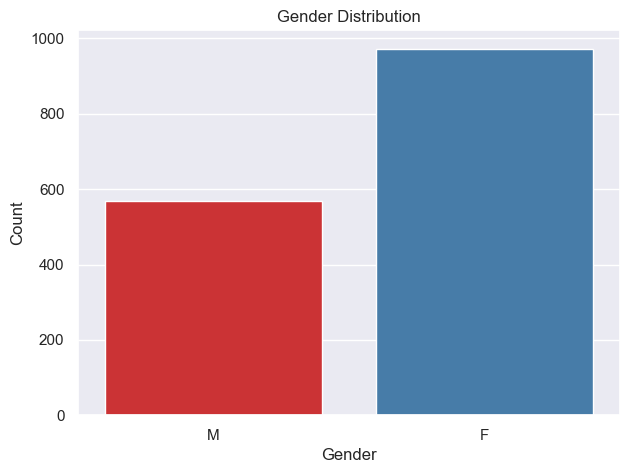

In [13]:
# Create a count plot for the "Gender" column
sns.set(style="darkgrid")  # Set the style of the plot
plt.figure(figsize=(7, 5))  # Set the figure size

sns.countplot(data=credit_card, x="Gender", palette="Set1")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")

# Show the plot
plt.show()

- Bivariate analysis with label(target variable)

label     0   1
Gender         
F       878  95
M       493  75


<Figure size 800x600 with 0 Axes>

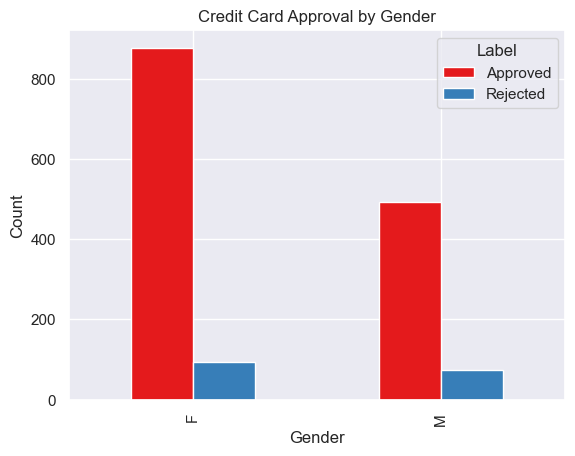

In [14]:
# Create a cross-tabulation between 'Gender' and 'label'
cross_table = pd.crosstab(credit_card['Gender'], credit_card['label'])
print(cross_table)

# Create a bar plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.set_palette("Set1")
cross_table.plot(kind='bar')

# Customize the plot
plt.title('Credit Card Approval by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Label', labels=['Approved', 'Rejected'])

# Show the plot
plt.show()

Interpretation:

- The dataset contains a higher number of females (F) compared to males (M), with females constituting approximately 62.85% of the dataset and males approximately 36.69%.
- Despite the higher representation of females, the majority of individuals in both gender categories have been approved for a credit card.
- Females have a higher approval rate (approximately 90.30%) compared to males (approximately 86.80%), which could partly be attributed to their larger presence in the dataset.
- Rejected credit card applications are relatively lower in number in both gender categories

# 2.1.2. Car owner

In [15]:
column_summary(credit_card,'Car_owner')

Column Name: Car_owner
**************************************************
Description (Categorical):
   Count  Frequency (%)
N    924      59.689922
Y    624      40.310078
**************************************************
Object Type:
object
**************************************************
Value count:
   Count  Frequency (%)
N    924      59.689922
Y    624      40.310078


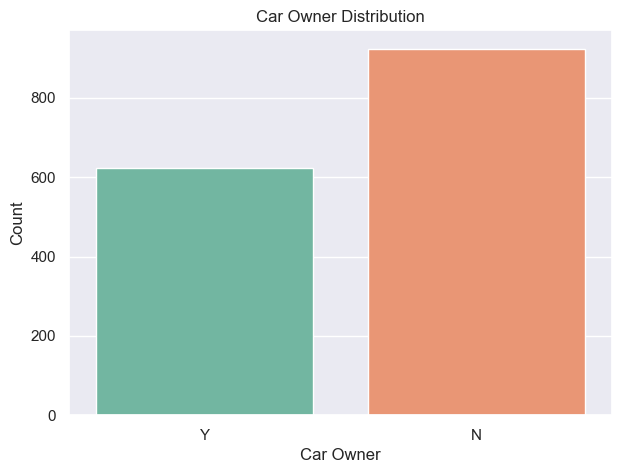

In [16]:
# Create a count plot for the "Car_owner" column
sns.set(style="darkgrid")  # Set the style of the plot
plt.figure(figsize=(7, 5))  # Set the figure size

sns.countplot(data=credit_card, x="Car_owner", palette="Set2")
plt.title("Car Owner Distribution")
plt.xlabel("Car Owner")
plt.ylabel("Count")

# Show the plot
plt.show()

- Bivariate analysis with label(target variable)

label        0    1
Car_owner          
N          816  108
Y          557   67


<Figure size 800x600 with 0 Axes>

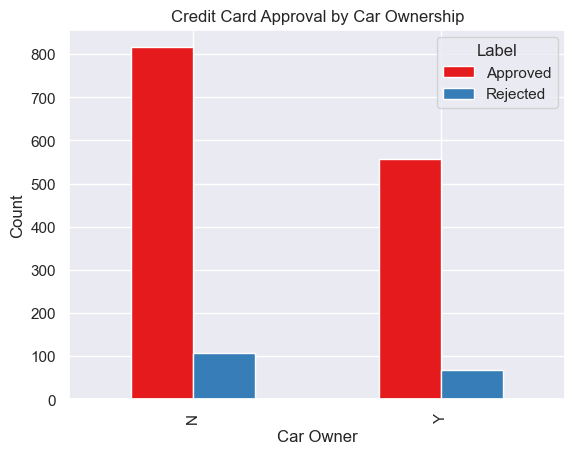

In [17]:
# Create a cross-tabulation between 'Car_Owner' and 'label'
cross_table = pd.crosstab(credit_card['Car_owner'], credit_card['label'])
print(cross_table)

# Create a stacked bar plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.set_palette("Set1")
cross_table.plot(kind='bar')

# Customize the plot
plt.title('Credit Card Approval by Car Ownership')
plt.xlabel('Car Owner')
plt.ylabel('Count')
plt.legend(title='Label', labels=['Approved', 'Rejected'])

# Show the plot
plt.show()

Interpretation:

- Most applicant don’t own a car
- The majority of individuals in both car ownership categories have been approved for a credit card.
- Individuals who do not own a car ("N") have a slightly higher approval rate (approximately 88.36%) compared to those who own a car ("Y") with an approval rate of approximately 89.34%.
- Rejected credit card applications are relatively lower in number in both car ownership categories.

# 2.1.3. Property Owner

In [18]:
column_summary(credit_card,'Property_owner')

Column Name: Property_owner
**************************************************
Description (Categorical):
   Count  Frequency (%)
Y   1010      65.245478
N    538      34.754522
**************************************************
Object Type:
object
**************************************************
Value count:
   Count  Frequency (%)
Y   1010      65.245478
N    538      34.754522


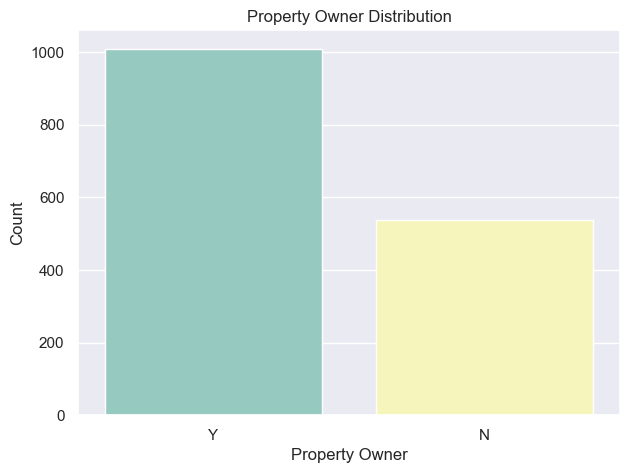

In [19]:
# Create a count plot for the "Property_owner" column
sns.set(style="darkgrid")  # Set the style of the plot
plt.figure(figsize=(7, 5))  # Set the figure size

sns.countplot(data=credit_card, x="Property_owner", palette="Set3")
plt.title("Property Owner Distribution")
plt.xlabel("Property Owner")
plt.ylabel("Count")

# Show the plot
plt.show()

- Bivariate analysis with label(target variable)

label             0    1
Property_owner          
N               473   65
Y               900  110


<Figure size 800x600 with 0 Axes>

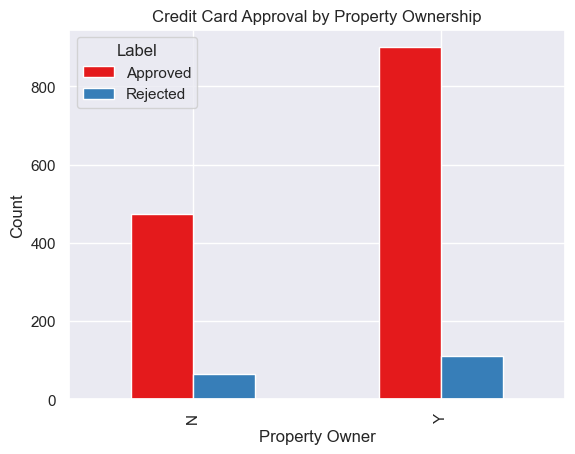

In [20]:
# Create a cross-tabulation between 'Property_owner' and 'label'
cross_table = pd.crosstab(credit_card['Property_owner'],credit_card['label'])
print(cross_table)
# Create a stacked bar plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.set_palette("Set1")
cross_table.plot(kind='bar')

# Customize the plot
plt.title('Credit Card Approval by Property Ownership')
plt.xlabel('Property Owner')
plt.ylabel('Count')
plt.legend(title='Label', labels=['Approved', 'Rejected'])

# Show the plot
plt.show()

Interpretation:

- Most applicants own a property
- The majority of individuals, whether they own a property ("Y") or not ("N"), have been approved for a credit card.
- Individuals who own a property ("Y") have a relatively higher approval rate (approximately 88.24%) compared to those who do     not own a property ("N") with an approval rate of approximately 87.96%.
- Rejected credit card applications are relatively lower in number in both property ownership categories.
- Property ownership appears to be associated with credit card approval status, with property owners having a slightly higher     approval rate, but the difference is not substantial.

# 2.1.4.  Children 

In [21]:
column_summary(credit_card,'Children')

Column Name: Children
**************************************************
Description (Numerical):
count    1548.000000
mean        0.412791
std         0.776691
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        14.000000
Name: Children, dtype: float64
**************************************************
Object Type:
int64
**************************************************
Value count:
    Count  Frequency (%)
0    1091      70.478036
1     305      19.702842
2     134       8.656331
3      16       1.033592
4       1       0.064599
14      1       0.064599


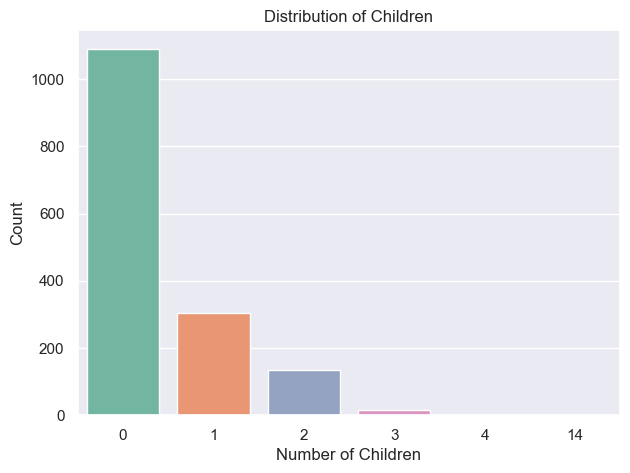

In [22]:
#Create a count plot for 'Children' column
sns.set(style="darkgrid")  # Set the style of the plot
plt.figure(figsize=(7, 5))  # Set the figure size

sns.countplot(data=credit_card, x="Children", palette="Set2")
plt.title("Distribution of Children")
plt.xlabel("Number of Children")
plt.ylabel("Count")

# Show the plot
plt.show()

- Bivariate analysis with label(target variable)

label       0    1
Children          
0         965  126
1         269   36
2         122   12
3          16    0
4           0    1
14          1    0


<Figure size 1000x600 with 0 Axes>

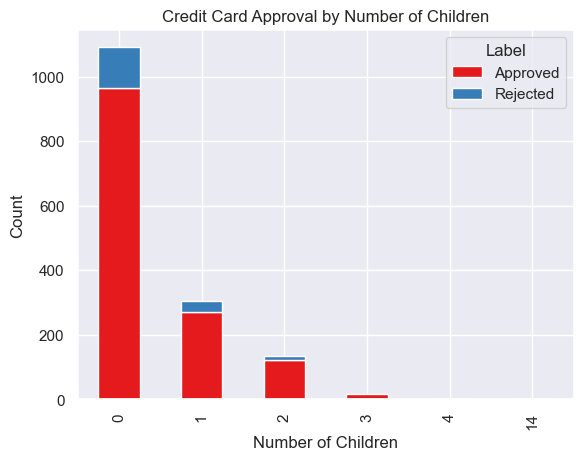

In [23]:
# Create a cross-tabulation between 'Children' and 'label'
cross_table = pd.crosstab(credit_card['Children'], credit_card['label'])
print(cross_table)
# Create a stacked bar plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.set_palette("Set1")
cross_table.plot(kind='bar', stacked=True)

# Customize the plot
plt.title('Credit Card Approval by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.legend(title='Label', labels=['Approved', 'Rejected'], loc='upper right')

# Show the plot
plt.show()

Interpretation:-

- The majority of individuals in the dataset do not have children (0 children), and they have a relatively high approval rate (approximately 88.47%). This suggests that people without children are more likely to be approved for a credit card.
- Individuals with 1 or 2 children also have a high approval rate, with approximately 88.17% and 91.04%, respectively. This indicates that having a small number of children doesn't significantly impact credit card approval rates.
- Interestingly, individuals with 3 children have a 100% approval rate, with none of them being rejected for a credit card. While this may seem unusual, it could be due to the small sample size of individuals with 3 children in the dataset.
- There are fewer individuals with 4 children, and their approval rate is split evenly at 50%. This suggests that having four children might have a more mixed impact on credit card approval.
- There is also an extreme case with 14 children, where the approval rate is 100%. However, it's important to note that this is based on a single instance, and it may not be representative of a broader trend due to the small sample size.

# 2.1.5. Annual income

In [24]:
column_summary(credit_card,'Annual_income')

Column Name: Annual_income
**************************************************
Description (Numerical):
count    1.525000e+03
mean     1.913993e+05
std      1.132530e+05
min      3.375000e+04
25%      1.215000e+05
50%      1.665000e+05
75%      2.250000e+05
max      1.575000e+06
Name: Annual_income, dtype: float64
**************************************************
Object Type:
float64
**************************************************
Value count:
          Count  Frequency (%)
135000.0    170      10.981912
112500.0    144       9.302326
180000.0    137       8.850129
157500.0    125       8.074935
225000.0    119       7.687339
...         ...            ...
119700.0      1       0.064599
69372.0       1       0.064599
37800.0       1       0.064599
333000.0      1       0.064599
69750.0       1       0.064599

[115 rows x 2 columns]


In [25]:
import plotly.express as px

# Create a box plot for the "Annual_income" column
fig = px.box(credit_card, y='Annual_income')

# Show the plot
fig.show()

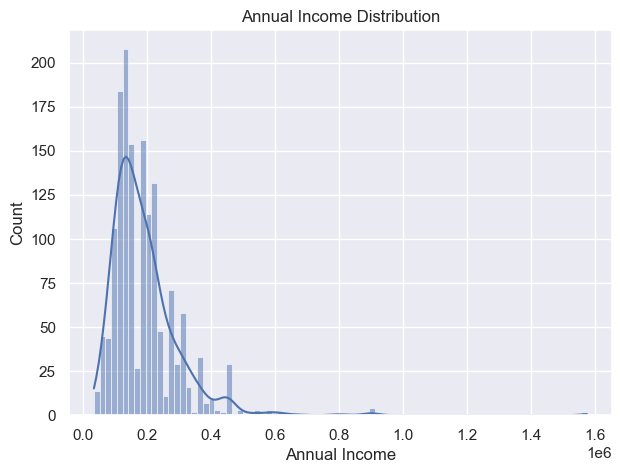

In [26]:
# Create a Histogram for annual income
sns.set(style="darkgrid")  # Set the style of the plot
plt.figure(figsize=(7, 5))  # Set the figure size

# Create a distribution plot for the "Annual_income" column with a curve and histogram
sns.histplot(data=credit_card, x="Annual_income", kde=True)
plt.title("Annual Income Distribution")
plt.xlabel("Annual Income")

# Show the plot
plt.show()

Interpretation:-
- The average annual income in the dataset is approximately 191,029, but it's important to note that this average can be heavily influenced by outliers.
- The most common income range appears to be between 112,500 and 135,000, accounting for approximately 10.98% of the dataset   This suggests that a significant portion of applicants falls within this income range.
- The majority of incomes fall within the range of 121,500 to 225,000, indicating that a substantial portion of applicants have annual incomes in this bracket.
- There are a few applicants (outliers) who report significantly higher annual incomes, with the highest reported income being over 1,000,000. These outliers can skew the average income upward.
- The distribution of annual income is positively skewed, meaning that there are relatively few individuals with very high incomes that pull the mean income higher. Most applicants have incomes clustered towards the lower to middle-income range.

- Bivariate Analysis with label(target variable)

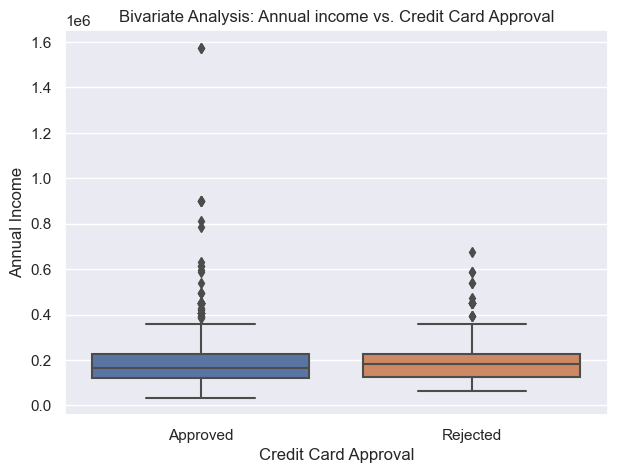

In [27]:
# Create a box plot
plt.figure(figsize=(7, 5))
sns.boxplot(x='label', y='Annual_income', data=credit_card)
plt.xlabel('Credit Card Approval')
plt.ylabel('Annual Income')
plt.title('Bivariate Analysis: Annual income vs. Credit Card Approval')
plt.xticks([0, 1], ['Approved', 'Rejected'])

# Show the plot
plt.show()

- Approved and rejected applicants have roughly similar income

- Perform binning for better analysis 

In [28]:
# Define income categories and thresholds based on the column summary
income_thresholds = [0, 50000, 112500, 135000, 157500, 180000, 225000, 1575000]  # Adjust income thresholds as needed
income_categories = ['Income < 50K', '50K - 112.5K', '112.5K - 135K', '135K - 157.5K', '157.5K - 180K', '180K - 225K', 'Income > 225K']

# Create a new column 'Income_Category' based on the income thresholds
credit_card['Income_Category'] = pd.cut(credit_card['Annual_income'], bins=income_thresholds, labels=income_categories, right=False)

label              0   1  Approval Count  Rejection Count
Income_Category                                          
Income < 50K      14   0              14                0
50K - 112.5K     179  27             179               27
112.5K - 135K    187  22             187               22
135K - 157.5K    181  20             181               20
157.5K - 180K    138  14             138               14
180K - 225K      248  35             248               35
Income > 225K    409  49             409               49


<Figure size 1000x600 with 0 Axes>

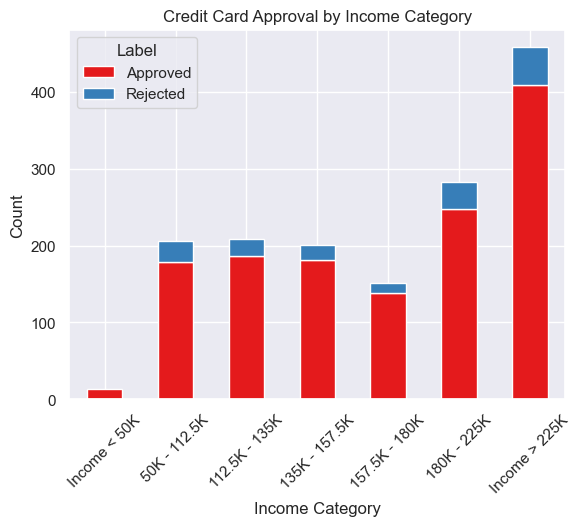

In [29]:
# Create a cross-tabulation between 'Income_Category' and 'label'
cross_table = pd.crosstab(credit_card['Income_Category'], credit_card['label'])

# Calculate approval and rejection counts within each income category
cross_table['Approval Count'] = cross_table[0]
cross_table['Rejection Count'] = cross_table[1]
print(cross_table)
# Create a bar plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.set_palette("Set1")
cross_table[['Approval Count', 'Rejection Count']].plot(kind='bar', stacked=True)

# Customize the plot
plt.title('Credit Card Approval by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Label', labels=['Approved', 'Rejected'])

# Show the plot
plt.show()

Interpretation:-
- Applicants with incomes below 50k had a 100% approval rate, meaning all of them were approved for a credit card.
- The 'Income < 50K' category stands out as having the highest approval rate, but it also had the smallest number of applicants.
- Generally, as income increases, the number of approvals tends to increase as well, but there are still rejections in each income category.
- The 'Income > 225K' category had the most applicants, and a majority of them were approved, but there were still rejections.
- The analysis suggests that income is a significant factor in credit card approval decisions, with higher incomes generally associated with higher approval rates. However, it's essential to consider other factors and potential nuances in the data to gain a complete understanding of the approval process.

# 2.1.6. Type Income

In [30]:
column_summary(credit_card,'Type_income')

Column Name: Type_income
**************************************************
Description (Categorical):
                      Count  Frequency (%)
Working                 798      51.550388
Commercial associate    365      23.578811
Pensioner               269      17.377261
State servant           116       7.493540
**************************************************
Object Type:
object
**************************************************
Value count:
                      Count  Frequency (%)
Working                 798      51.550388
Commercial associate    365      23.578811
Pensioner               269      17.377261
State servant           116       7.493540


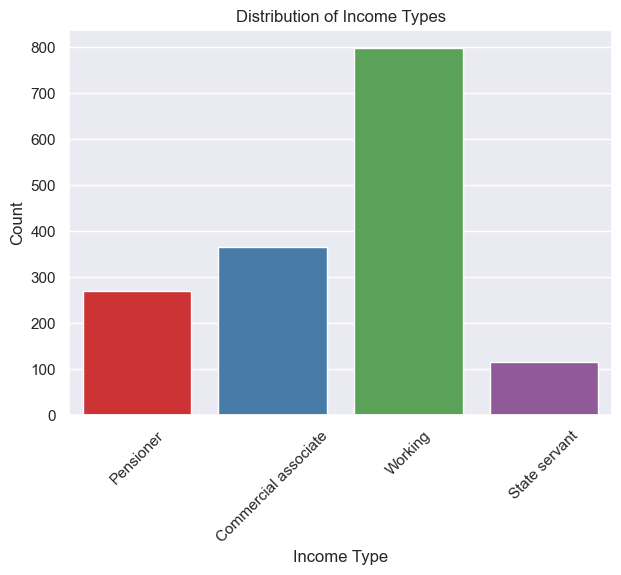

In [31]:
#Create a bar plot for type_income
sns.set(style="darkgrid")  # Set the style of the plot
plt.figure(figsize=(7,5))  # Set the figure size

# Create a count plot for the "Type_income" column
sns.countplot(data=credit_card, x="Type_income", palette="Set1")
plt.title("Distribution of Income Types")
plt.xlabel("Income Type")
plt.ylabel("Count")

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()

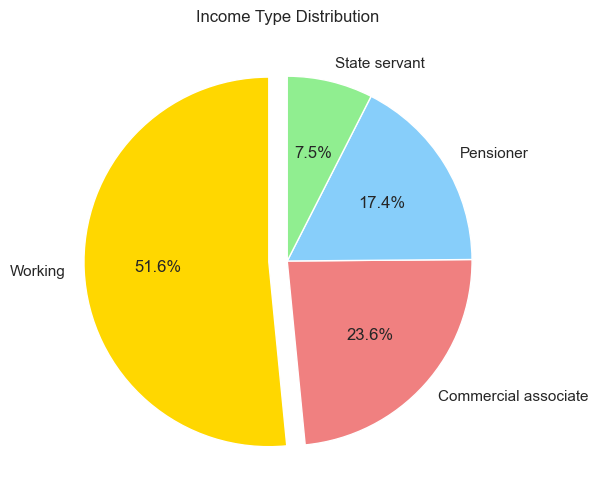

In [32]:
income_types = ['Working', 'Commercial associate', 'Pensioner', 'State servant']
counts = [798, 365, 269, 116]
percentages = [51.55, 23.58, 17.38, 7.49]

# Create a pie chart
plt.figure(figsize=(6, 6))  # Set the figure size
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen']  # Assign colors to income types
explode = (0.1, 0, 0, 0)  # Explode the first slice (Working)

plt.pie(counts, labels=income_types, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
plt.title("Income Type Distribution")

# Show the pie chart
plt.show()

- Bivariate analysis with target variable

label                   0   1  Approval Count  Rejection Count
Type_income                                                   
Commercial associate  315  50             315               50
Pensioner             227  42             227               42
State servant         110   6             110                6
Working               721  77             721               77


<Figure size 1200x600 with 0 Axes>

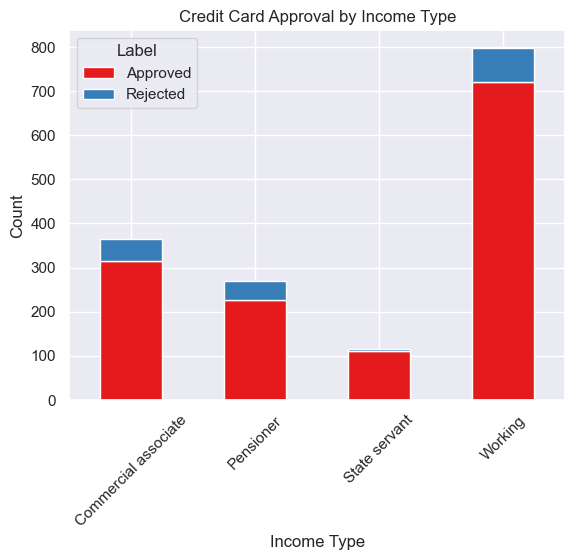

In [33]:
# Create a cross-tabulation between 'Type_Income' and 'label'
cross_table = pd.crosstab(credit_card['Type_income'], credit_card['label'])

# Calculate approval and rejection counts within each income type
cross_table['Approval Count'] = cross_table[0]
cross_table['Rejection Count'] = cross_table[1]
print(cross_table)
# Create a bar plot to visualize the relationship
plt.figure(figsize=(12, 6))
sns.set_palette("Set1")
cross_table[['Approval Count', 'Rejection Count']].plot(kind='bar', stacked=True)

# Customize the plot
plt.title('Credit Card Approval by Income Type')
plt.xlabel('Income Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Label', labels=['Approved', 'Rejected'])

# Show the plot
plt.show()

Interpretation:

- Most applicants are employed.
- Credit card approval rates vary across different income sources. "State servant" income source has the highest approval rate     at approximately 94.83%, followed by "Working" individuals at approximately 90.61%.
- "Commercial associate" and "Pensioner" income sources also exhibit relatively high approval rates, at approximately 86.30% and   84.21%, respectively.
- Although there are variations in approval rates, it's important to note that each income source category experiences some       credit card rejections.
- The analysis underscores the significance of income source in shaping credit card approval outcomes, with certain sources       being more favorable for approval than others.

# 2.1.7. Education

In [34]:
column_summary(credit_card,'Education')

Column Name: Education
**************************************************
Description (Categorical):
                               Count  Frequency (%)
Secondary / secondary special   1031      66.602067
Higher education                 426      27.519380
Incomplete higher                 68       4.392765
Lower secondary                   21       1.356589
Academic degree                    2       0.129199
**************************************************
Object Type:
object
**************************************************
Value count:
                               Count  Frequency (%)
Secondary / secondary special   1031      66.602067
Higher education                 426      27.519380
Incomplete higher                 68       4.392765
Lower secondary                   21       1.356589
Academic degree                    2       0.129199


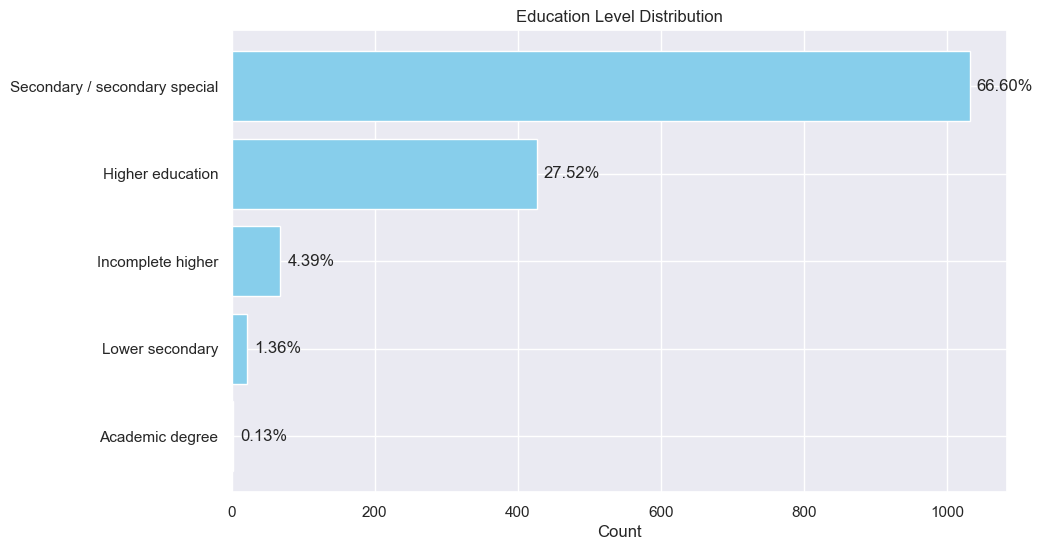

In [35]:
education_levels = ['Secondary / secondary special', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Academic degree']
counts = [1031, 426, 68, 21, 2]
percentages = [66.60, 27.52, 4.39, 1.36, 0.13]

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))  # Set the figure size

plt.barh(education_levels, counts, color='skyblue')
plt.xlabel('Count')
plt.title('Education Level Distribution')

# Annotate the percentages on the bars
for i, count in enumerate(counts):
    plt.text(count + 10, i, f'{percentages[i]:.2f}%', va='center')

plt.gca().invert_yaxis()  # Invert the y-axis for better readability

# Show the plot
plt.show()


- Bivariate analysis with label(target variable)

label                            0    1  Approval Count  Rejection Count
Education                                                               
Academic degree                  2    0               2                0
Higher education               371   55             371               55
Incomplete higher               63    5              63                5
Lower secondary                 15    6              15                6
Secondary / secondary special  922  109             922              109


<Figure size 1200x600 with 0 Axes>

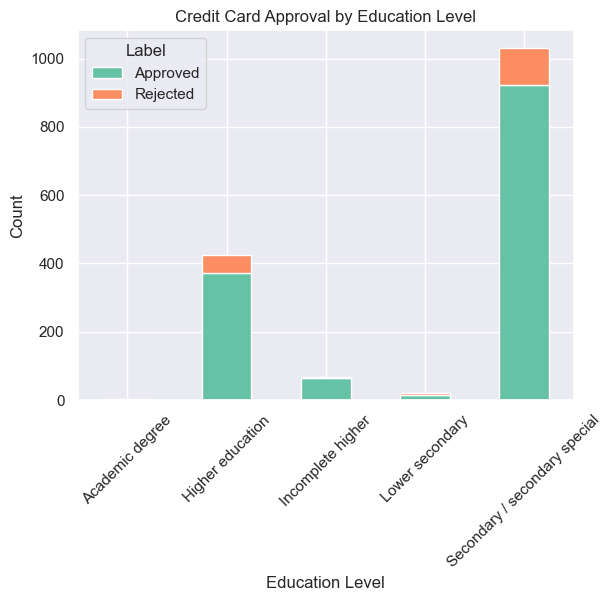

In [36]:
# Create a cross-tabulation between 'Education' and 'label'
cross_table = pd.crosstab(credit_card['Education'], credit_card['label'])

# Calculate approval and rejection counts within each education level
cross_table['Approval Count'] = cross_table[0]
cross_table['Rejection Count'] = cross_table[1]
print(cross_table)
# Create a bar plot to visualize the relationship
plt.figure(figsize=(12, 6))
sns.set_palette("Set2")
cross_table[['Approval Count', 'Rejection Count']].plot(kind='bar', stacked=True)

# Customize the plot
plt.title('Credit Card Approval by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Label', labels=['Approved', 'Rejected'])

# Show the plot
plt.show()

Interpretation:

- Applicants with a "Secondary / secondary special" education background have the highest representation in the dataset, comprising approximately 66.60% of applicants. They also exhibit a moderate approval rate, with approximately 88.85% approved for credit cards.
- Those with a "Higher education" background, accounting for approximately 27.52% of applicants, tend to have a slightly lower approval rate at approximately 85.50%.
- Applicants with an "Incomplete higher" or "Lower secondary" education background have lower representation in the dataset but maintain approval rates of approximately 90.48% and 71.43%, respectively.
- Individuals holding an "Academic degree" have the lowest representation (0.13%) and a 100% approval rate, but their low sample size limits conclusive insights. Overall, education level appears to influence credit card approval outcomes, with variations in approval rates across different educational backgrounds.


# 2.1.8. Marital Status 

In [37]:
column_summary(credit_card,'Marital_status')

Column Name: Marital_status
**************************************************
Description (Categorical):
                      Count  Frequency (%)
Married                1049      67.764858
Single / not married    227      14.664083
Civil marriage          101       6.524548
Separated                96       6.201550
Widow                    75       4.844961
**************************************************
Object Type:
object
**************************************************
Value count:
                      Count  Frequency (%)
Married                1049      67.764858
Single / not married    227      14.664083
Civil marriage          101       6.524548
Separated                96       6.201550
Widow                    75       4.844961


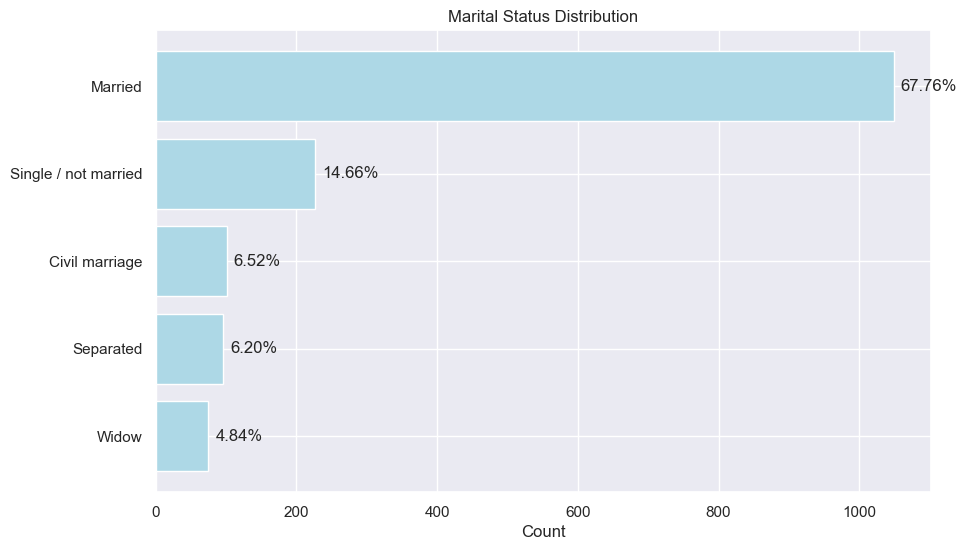

In [38]:
# Data
marital_status = ['Married', 'Single / not married', 'Civil marriage', 'Separated', 'Widow']
counts = [1049, 227, 101, 96, 75]
percentages = [67.76, 14.66, 6.52, 6.20, 4.84]

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))  # Set the figure size

plt.barh(marital_status, counts, color='lightblue')
plt.xlabel('Count')
plt.title('Marital Status Distribution')

# Annotate the percentages on the bars
for i, count in enumerate(counts):
    plt.text(count + 10, i, f'{percentages[i]:.2f}%', va='center')

plt.gca().invert_yaxis()  # Invert the y-axis for better readability

# Show the plot
plt.show()

- Bivariate analysis with label(target variable)

label                   0    1  Approval Count  Rejection Count
Marital_status                                                 
Civil marriage         97    4              97                4
Married               935  114             935              114
Separated              82   14              82               14
Single / not married  192   35             192               35
Widow                  67    8              67                8


<Figure size 1200x600 with 0 Axes>

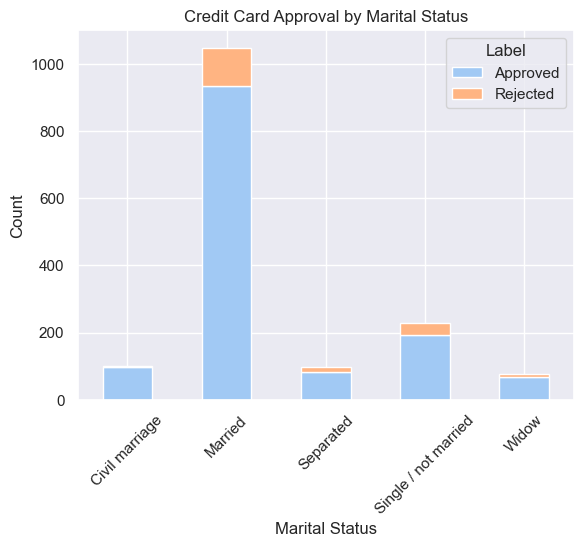

In [39]:
# Create a cross-tabulation between 'Marital_status' and 'label'
cross_table = pd.crosstab(credit_card['Marital_status'], credit_card['label'])

# Calculate approval and rejection counts within each marital status
cross_table['Approval Count'] = cross_table[0]
cross_table['Rejection Count'] = cross_table[1]
print(cross_table)
# Create a bar plot to visualize the relationship
plt.figure(figsize=(12, 6))
sns.set_palette("pastel")
cross_table[['Approval Count', 'Rejection Count']].plot(kind='bar', stacked=True)

# Customize the plot
plt.title('Credit Card Approval by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Label', labels=['Approved', 'Rejected'], loc='upper right')

# Show the plot
plt.show()

Interpretation:
    
- The majority of credit card applicants in the dataset are "Married" individuals, constituting approximately 67.76% of the applicants. They also exhibit a moderate approval rate, with approximately 89.09% approved for credit cards.
- "Single / not married" applicants make up about 14.66% of the dataset and have a lower but still relatively high approval rate at approximately 85.72%.
- "Civil marriage" and "Separated" individuals, accounting for approximately 6.52% and 6.20% of the applicants respectively, maintain approval rates of approximately 95.05% and 85.42%.
- "Widow" applicants, representing approximately 4.84% of the dataset, have an approval rate of approximately 91.43%. Overall, marital status appears to influence credit card approval outcomes, with variations in approval rates across different marital status categories.

# 2.1.9. Housing Type

In [40]:
column_summary(credit_card,'Housing_type')

Column Name: Housing_type
**************************************************
Description (Categorical):
                     Count  Frequency (%)
House / apartment     1380      89.147287
With parents            80       5.167959
Municipal apartment     53       3.423773
Rented apartment        21       1.356589
Office apartment         9       0.581395
Co-op apartment          5       0.322997
**************************************************
Object Type:
object
**************************************************
Value count:
                     Count  Frequency (%)
House / apartment     1380      89.147287
With parents            80       5.167959
Municipal apartment     53       3.423773
Rented apartment        21       1.356589
Office apartment         9       0.581395
Co-op apartment          5       0.322997


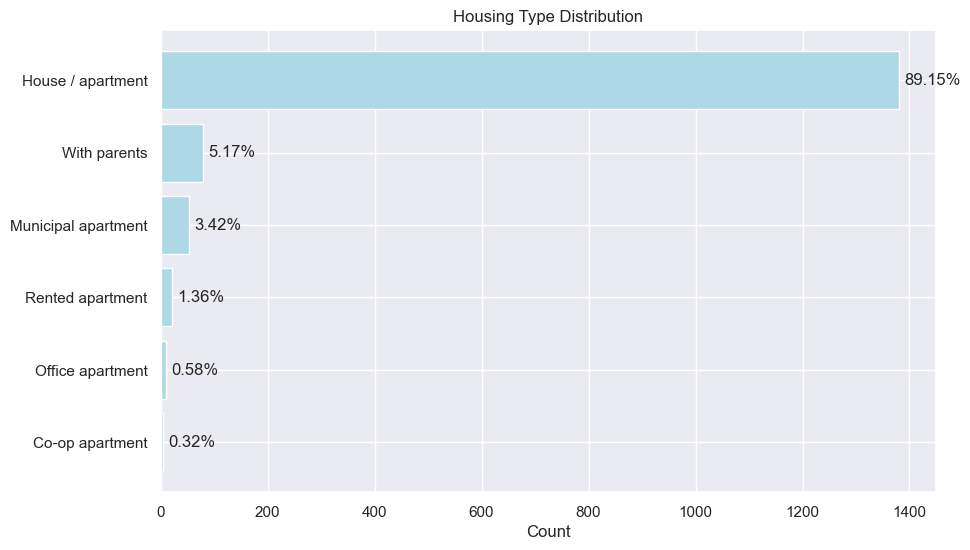

In [41]:
# Data
housing_types = ['House / apartment', 'With parents', 'Municipal apartment', 'Rented apartment', 'Office apartment', 'Co-op apartment']
counts = [1380, 80, 53, 21, 9, 5]
percentages = [89.15, 5.17, 3.42, 1.36, 0.58, 0.32]

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))  # Set the figure size

plt.barh(housing_types, counts, color='lightblue')
plt.xlabel('Count')
plt.title('Housing Type Distribution')

# Annotate the percentages on the bars
for i, count in enumerate(counts):
    plt.text(count + 10, i, f'{percentages[i]:.2f}%', va='center')

plt.gca().invert_yaxis()  # Invert the y-axis for better readability

# Show the plot
plt.show()

- Bivariate analysis with label(target variable)

label                   0    1  Approval Count  Rejection Count
Housing_type                                                   
Co-op apartment         3    2               3                2
House / apartment    1234  146            1234              146
Municipal apartment    37   16              37               16
Office apartment        7    2               7                2
Rented apartment       17    4              17                4
With parents           75    5              75                5


<Figure size 1200x600 with 0 Axes>

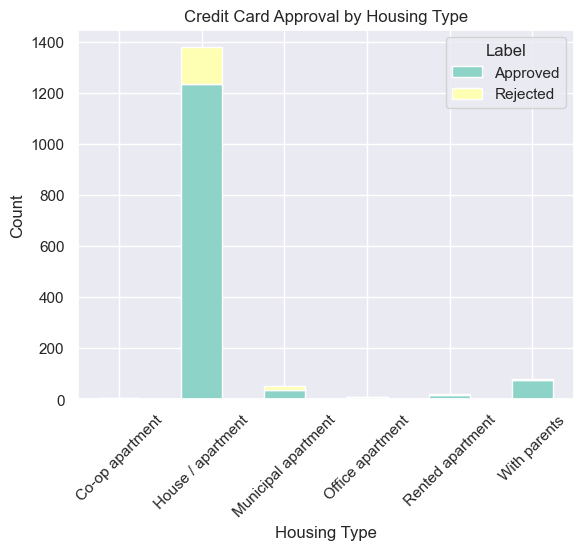

In [42]:
# Create a cross-tabulation between 'Housing_type' and 'label'
cross_table = pd.crosstab(credit_card['Housing_type'], credit_card['label'])

# Calculate approval and rejection counts within each housing type
cross_table['Approval Count'] = cross_table[0]
cross_table['Rejection Count'] = cross_table[1]
print(cross_table)
# Create a bar plot to visualize the relationship
plt.figure(figsize=(12, 6))
sns.set_palette("Set3")
cross_table[['Approval Count', 'Rejection Count']].plot(kind='bar', stacked=True)

# Customize the plot
plt.title('Credit Card Approval by Housing Type')
plt.xlabel('Housing Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Label', labels=['Approved', 'Rejected'])

# Show the plot
plt.show()

Interpretation:
- The most common housing type among credit card applicants is "House / apartment," accounting for approximately 89.15% of applicants. These individuals also exhibit a relatively high approval rate, with approximately 89.08% approved for credit cards.
- "With parents" housing type, representing approximately 5.17% of applicants, has a slightly lower approval rate at approximately 86.21%.
- "Municipal apartment," "Rented apartment," "Office apartment," and "Co-op apartment" have lower representation in the dataset. Among these, "Municipal apartment" has the highest approval rate at approximately 43.40%, while "Rented apartment," "Office apartment," and "Co-op apartment" have relatively lower approval rates.
- Overall, the type of housing appears to have some influence on credit card approval outcomes, with variations in approval rates across different housing types.

# 2.1.10. Age

In [43]:
column_summary(credit_card,'Age')

Column Name: Age
**************************************************
Description (Numerical):
count    1526.000000
mean       43.923984
std        11.592626
min        21.000000
25%        34.000000
50%        43.000000
75%        53.750000
max        68.000000
Name: Age, dtype: float64
**************************************************
Object Type:
float64
**************************************************
Value count:
      Count  Frequency (%)
42.0     54       3.488372
40.0     49       3.165375
44.0     48       3.100775
34.0     48       3.100775
37.0     47       3.036176
28.0     46       2.971576
39.0     46       2.971576
52.0     44       2.842377
32.0     43       2.777778
27.0     43       2.777778
35.0     43       2.777778
47.0     42       2.713178
33.0     42       2.713178
38.0     42       2.713178
30.0     41       2.648579
57.0     39       2.519380
29.0     39       2.519380
48.0     39       2.519380
41.0     39       2.519380
31.0     38       2.454780
49.0     3

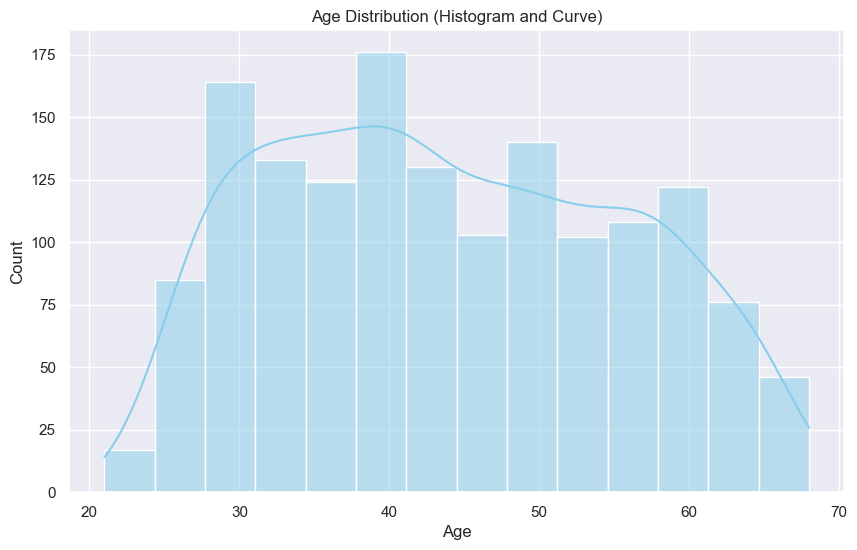

In [44]:
# Create a distribution plot with histogram and curve
sns.set(style="darkgrid")  # Set the style of the plot
plt.figure(figsize=(10, 6))  # Set the figure size

sns.histplot(credit_card['Age'], kde=True, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution (Histogram and Curve)')

# Show the plot
plt.show()

In [45]:
credit_card['Age'].skew()

0.16982876055753993

Interpretation:-
- The average age of the applicants in the dataset is approximately 43.92 years.
- The age distribution suggests a relatively diverse range of ages among the applicants, with no single age group dominating the dataset.
- The presence of 22 missing values in the "Age" column indicates that some applicants did not provide their age information.
- The data is fairly symmetric 

- Bivariate analysis with label(target variable)

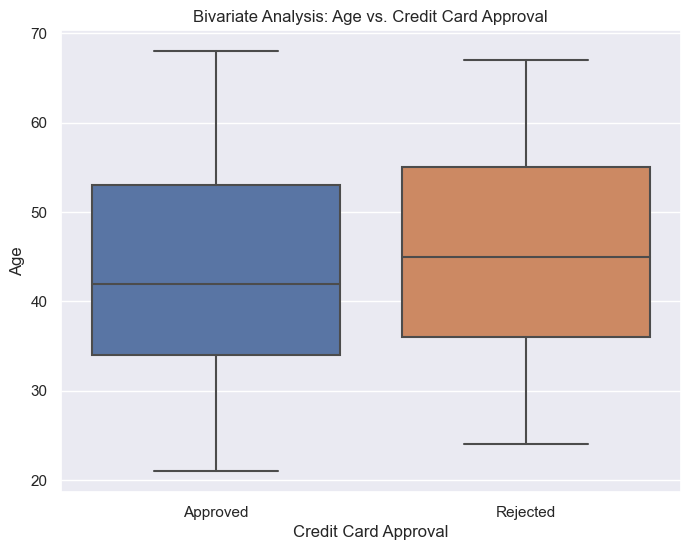

In [46]:
# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='Age', data=credit_card)
plt.xlabel('Credit Card Approval')
plt.ylabel('Age')
plt.title('Bivariate Analysis: Age vs. Credit Card Approval')
plt.xticks([0, 1], ['Approved', 'Rejected'])

# Show the plot
plt.show()

label        0   1  Approval Count  Rejection Count
Age_Group                                          
21-30      203  24             203               24
31-40      390  42             390               42
41-50      340  43             340               43
51-60      295  44             295               44
61-70      124  20             124               20


<Figure size 1000x600 with 0 Axes>

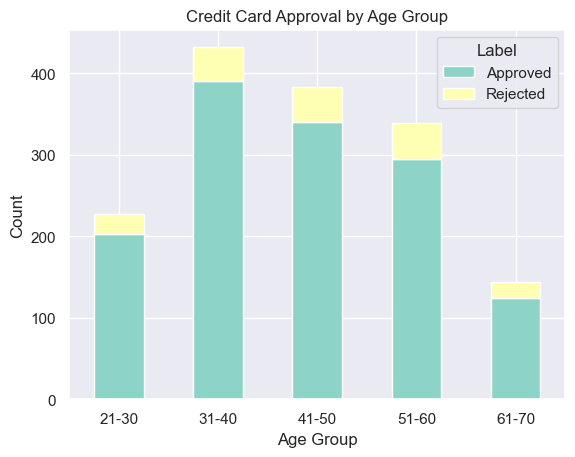

In [47]:
# Define age groups
age_bins = [21, 30, 40, 50, 60, 70]
age_labels = ['21-30', '31-40', '41-50', '51-60', '61-70']

# Create a new column 'Age_Group' using discretization
credit_card['Age_Group'] = pd.cut(credit_card['Age'], bins=age_bins, labels=age_labels)

# Create a cross-tabulation between 'Age_Group' and 'label'
cross_table = pd.crosstab(credit_card['Age_Group'], credit_card['label'])

# Calculate approval and rejection counts within each age group
cross_table['Approval Count'] = cross_table[0]
cross_table['Rejection Count'] = cross_table[1]
print(cross_table)
# Create a bar plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.set_palette("Set3")
cross_table[['Approval Count', 'Rejection Count']].plot(kind='bar', stacked=True)

# Customize the plot
plt.title('Credit Card Approval by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Label', labels=['Approved', 'Rejected'], loc='upper right')

# Show the plot
plt.show()

Interpretation:

- Credit card approval and rejection rates vary across different age groups.
- Applicants in the 21-30 age group had the lowest rejection rate at approximately 11.81%, while the 61-70 age group had the highest rejection rate at approximately 13.89%.
- The 51-60 age group also had a relatively high rejection rate, at approximately 12.98%.
- The 31-40 and 41-50 age groups had rejection rates of approximately 10.77% and 11.11%, respectively.

# 2.1.11. Employed Years

In [48]:
column_summary(credit_card,'Employed_years')

Column Name: Employed_years
**************************************************
Description (Numerical):
count    1548.000000
mean        6.071059
std         6.591026
min         0.000000
25%         1.000000
50%         4.000000
75%         9.000000
max        41.000000
Name: Employed_years, dtype: float64
**************************************************
Object Type:
int64
**************************************************
Value count:
    Count  Frequency (%)
0     305      19.702842
2     132       8.527132
1     130       8.397933
4     121       7.816537
3     118       7.622739
5     108       6.976744
6      92       5.943152
7      82       5.297158
9      67       4.328165
8      61       3.940568
10     60       3.875969
11     31       2.002584
15     31       2.002584
12     26       1.679587
14     25       1.614987
13     21       1.356589
19     18       1.162791
20     15       0.968992
17     14       0.904393
21     12       0.775194
16     11       0.710594
22     

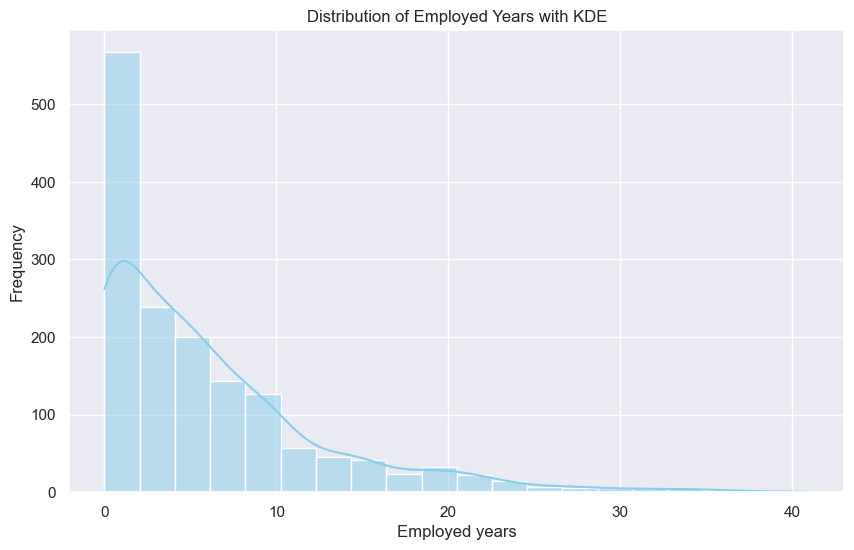

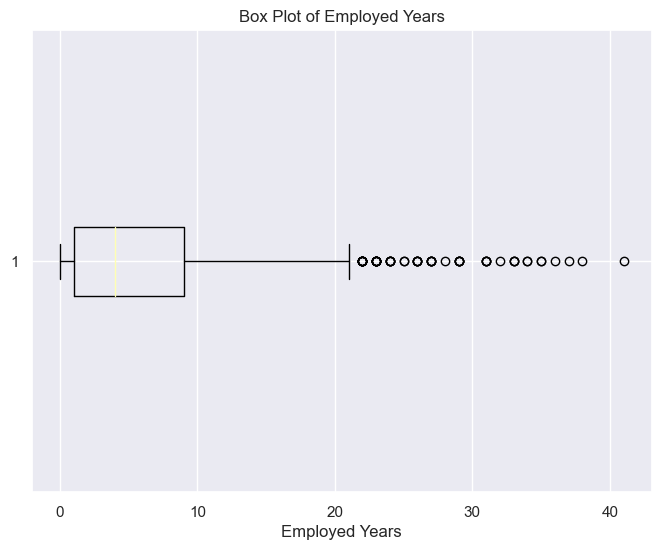

In [49]:
# Create a figure and axis for the plot
plt.figure(figsize=(10, 6))
ax = sns.histplot(credit_card['Employed_years'], bins=20, kde=True, color='skyblue')

# Customize the plot
ax.set_title('Distribution of Employed Years with KDE')
ax.set_xlabel('Employed years')
ax.set_ylabel('Frequency')

# Show the plot
plt.grid(True)
plt.show()

# Plot a box plot to visualize the summary statistics of employed months
plt.figure(figsize=(8, 6))
plt.boxplot(credit_card['Employed_years'], vert=False)
plt.title('Box Plot of Employed Years')
plt.xlabel('Employed Years')
plt.grid(True)
plt.show()

Interpretation:-

- The average number of years employed among applicants in the dataset is approximately 6.07 years, with a considerable standard deviation of approximately 6.59 years. This indicates a wide variation in employment durations among applicants.
- The most common category is "0 years," representing applicants who are currently unemployed or have recently entered the workforce. This category accounts for approximately 19.70% of the dataset.
- The column has a right-skewed distribution, implying that the majority of individuals in the dataset have shorter employment durations
- Some individuals in the dataset have exceptionally long employment histories, leading to outliers with significantly higher values in the column

- Bivariate Analysis with label(target variable)

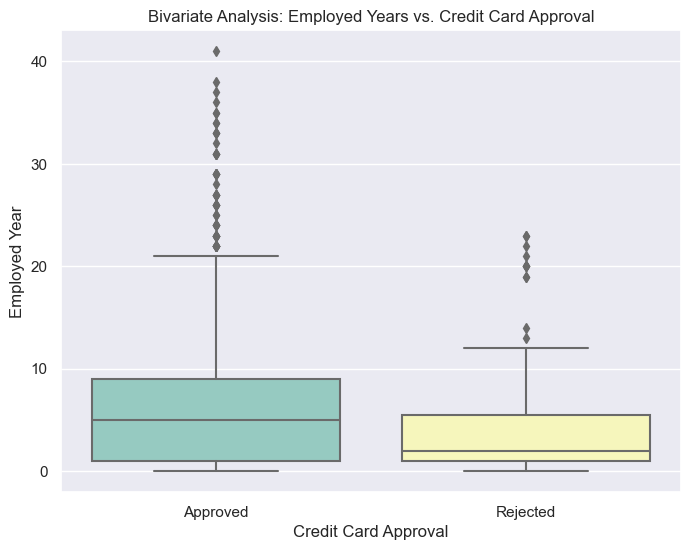

In [50]:
# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='Employed_years', data=credit_card)
plt.xlabel('Credit Card Approval')
plt.ylabel('Employed Year')
plt.title('Bivariate Analysis: Employed Years vs. Credit Card Approval')
plt.xticks([0, 1], ['Approved', 'Rejected'])

# Show the plot
plt.show()

label                  0   1  Approval Count  Rejection Count
Employed_years_bins                                          
<1                   377  58             377               58
1-5                  406  73             406               73
6-10                 337  25             337               25
11-20                187  15             187               15
21-30                 50   4              50                4
31-40                 15   0              15                0


<Figure size 1000x600 with 0 Axes>

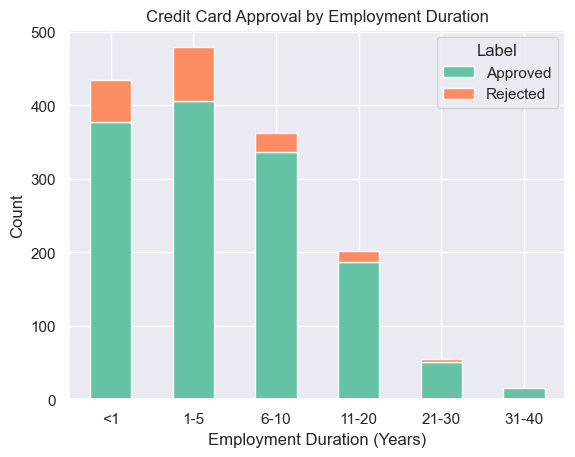

In [51]:
# Define the bin edges
bin_edges = [-1, 1, 5, 10, 20, 30, 40]

# Define bin labels
bin_labels = ['<1', '1-5', '6-10', '11-20', '21-30', '31-40']

# Create a new column 'Employed_years_bins' by applying binning
credit_card['Employed_years_bins'] = pd.cut(credit_card['Employed_years'], bins=bin_edges, labels=bin_labels)

# Create a cross-tabulation between 'Employed_years_bins' and 'label'
cross_table = pd.crosstab(credit_card['Employed_years_bins'], credit_card['label'])

# Calculate approval and rejection counts within each employment duration bin
cross_table['Approval Count'] = cross_table[0]
cross_table['Rejection Count'] = cross_table[1]
print(cross_table)
# Plot the cross-tabulation
plt.figure(figsize=(10, 6))
sns.set_palette("Set2")
cross_table[['Approval Count', 'Rejection Count']].plot(kind='bar', stacked=True)

# Customize the plot
plt.title('Credit Card Approval by Employment Duration')
plt.xlabel('Employment Duration (Years)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Label', labels=['Approved', 'Rejected'])

# Show the plot
plt.show()

Interpretation:
- Applicants with less than 1 year of employment ('<1') have a relatively higher rejection count compared to other categories, with 58 rejections out of 435 applicants. This suggests that individuals with very short employment histories may face challenges in obtaining credit cards.
- The '1-5' years employment duration category shows a similar pattern, with 73 rejections out of 479 applicants. Although the rejection count is higher than the '<1' category, it is still relatively lower compared to the approval count. This suggests that applicants with 1 to 5 years of employment have a better chance of approval.
- As the employment duration increases to '6-10' years and '11-20' years, the rejection counts decrease significantly, indicating a higher likelihood of credit card approval for these groups. Longer employment histories appear to positively influence approval rates.
- The '21-30' and '31-40' years categories have very low rejection counts, with no rejections recorded in the '31-40' category. This suggests that individuals with extensive employment histories are highly likely to be approved for credit cards.

# 2.1.12. Mobile Phone

In [52]:
column_summary(credit_card,'Mobile_phone')

Column Name: Mobile_phone
**************************************************
Description (Numerical):
count    1548.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: Mobile_phone, dtype: float64
**************************************************
Object Type:
int64
**************************************************
Value count:
   Count  Frequency (%)
1   1548          100.0


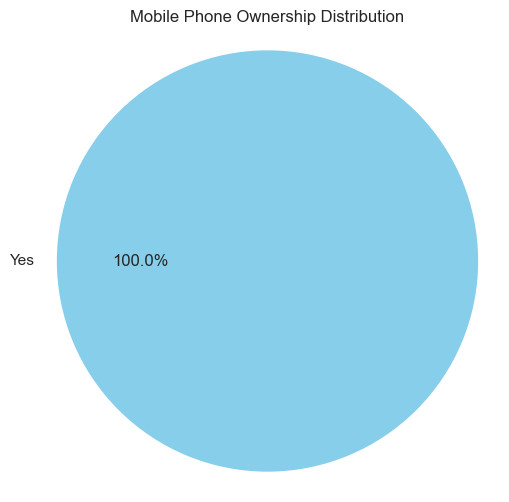

In [53]:
# Create data for the pie chart
labels = ['Yes']
sizes = [100]

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['skyblue'])

# Customize the plot
plt.title('Mobile Phone Ownership Distribution')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

Interpretation:

- All the applicants without exception have a mobile phone

# 2.1.13. Work phone

In [54]:
column_summary(credit_card,'Work_phone')

Column Name: Work_phone
**************************************************
Description (Numerical):
count    1548.000000
mean        0.208010
std         0.406015
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Work_phone, dtype: float64
**************************************************
Object Type:
int64
**************************************************
Value count:
   Count  Frequency (%)
0   1226      79.198966
1    322      20.801034


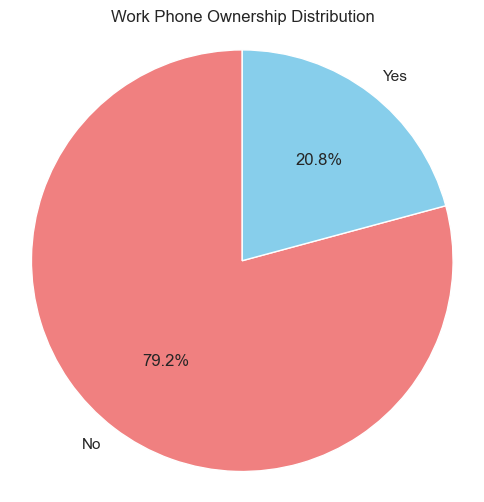

In [55]:
# Count the number of individuals with and without a work phone
work_phone_counts = credit_card['Work_phone'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(work_phone_counts, labels=['No', 'Yes'], autopct='%1.1f%%', colors=['lightcoral', 'skyblue'], startangle=90)

# Customize the plot
plt.title('Work Phone Ownership Distribution')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

Interpretation:

- More than ¾ of applicants don’t have a work phone

# 2.1.14. Phone

In [56]:
column_summary(credit_card,'Phone')

Column Name: Phone
**************************************************
Description (Numerical):
count    1548.000000
mean        0.309432
std         0.462409
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Phone, dtype: float64
**************************************************
Object Type:
int64
**************************************************
Value count:
   Count  Frequency (%)
0   1069      69.056848
1    479      30.943152


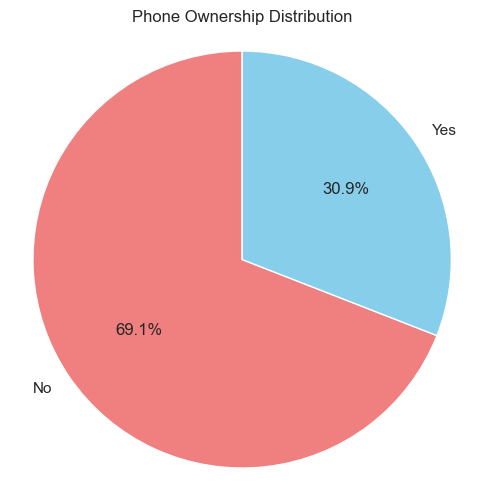

In [57]:
# Count the number of individuals with and without a phone
phone_counts = credit_card['Phone'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(phone_counts, labels=['No', 'Yes'], autopct='%1.1f%%', colors=['lightcoral', 'skyblue'], startangle=90)

# Customize the plot
plt.title('Phone Ownership Distribution')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

Interpretation:

- Most applicants don’t have a phone (probably a home phone)

# - Analysis of different phone connections with label(target variable)

                               Approved  Rejected
Mobile_phone Work_phone Phone                    
1            0          0           839       110
                        1           247        30
             1          0           109        11
                        1           178        24


<Figure size 1000x600 with 0 Axes>

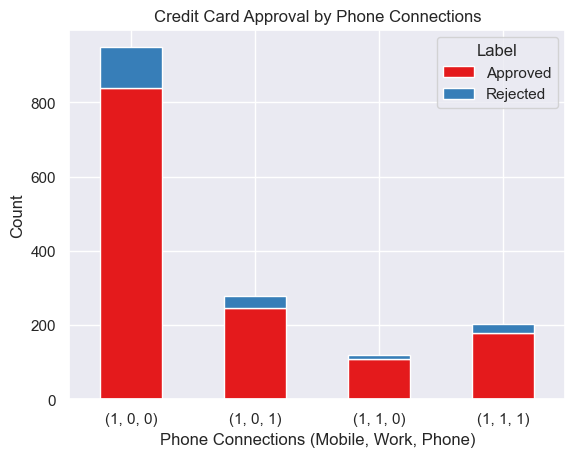

In [58]:
# Create a cross-tabulation for all three phone connection variables and label
phone_connection_cross_table = pd.crosstab([credit_card['Mobile_phone'], credit_card['Work_phone'], credit_card['Phone']], credit_card['label'])

# Rename the columns for clarity
phone_connection_cross_table.columns = ['Approved', 'Rejected']
print(phone_connection_cross_table)
# Create a bar plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.set_palette("Set1")
phone_connection_cross_table.plot(kind='bar', stacked=True)

# Customize the plot
plt.title('Credit Card Approval by Phone Connections')
plt.xlabel('Phone Connections (Mobile, Work, Phone)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Label', labels=['Approved', 'Rejected'])
plt.show()

Interpretation:

- Applicants without any phone (neither mobile nor work phone) had the lowest rejection rate, with only 110 rejections.
- Having either a mobile phone or a work phone (or both) was associated with a higher total of 547 rejections, suggesting a potential impact on rejection rates.
- The presence of a specific phone type (mobile or work) did not seem to significantly influence credit card approval or rejection rates.
- Overall, this table suggests that the presence of any phone (mobile or work phone) may be a more influential factor in credit card approval decisions than the specific type of phone.

# 2.1.15. Email_id

In [59]:
column_summary(credit_card,'Email_id')

Column Name: Email_id
**************************************************
Description (Numerical):
count    1548.000000
mean        0.092377
std         0.289651
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Email_id, dtype: float64
**************************************************
Object Type:
int64
**************************************************
Value count:
   Count  Frequency (%)
0   1405      90.762274
1    143       9.237726


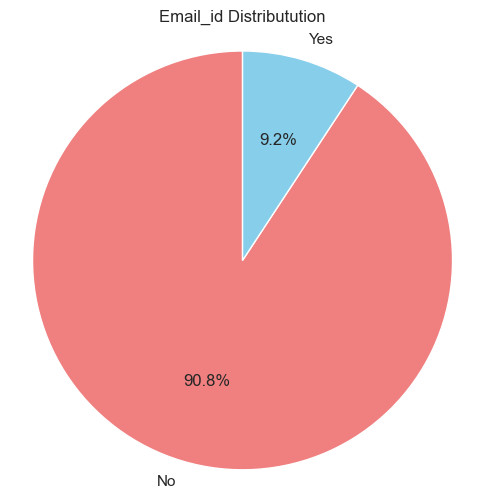

In [60]:
# Count the number of individuals with and without a email_id
email_counts = credit_card['Email_id'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(email_counts, labels=['No', 'Yes'], autopct='%1.1f%%', colors=['lightcoral', 'skyblue'], startangle=90)

# Customize the plot
plt.title('Email_id Distributution')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

- More than 90% applicants dont have email_id

# 2.1.16. Type Occupation

In [61]:
column_summary(credit_card,'Type_occupation')

Column Name: Type_occupation
**************************************************
Description (Categorical):
                       Count  Frequency (%)
Laborers                 268      17.312661
Core staff               174      11.240310
Managers                 136       8.785530
Sales staff              122       7.881137
Drivers                   86       5.555556
High skill tech staff     65       4.198966
Medicine staff            50       3.229974
Accountants               44       2.842377
Security staff            25       1.614987
Cleaning staff            22       1.421189
Cooking staff             21       1.356589
Private service staff     17       1.098191
Secretaries                9       0.581395
Low-skill Laborers         9       0.581395
Waiters/barmen staff       5       0.322997
HR staff                   3       0.193798
IT staff                   2       0.129199
Realty agents              2       0.129199
**************************************************
Object

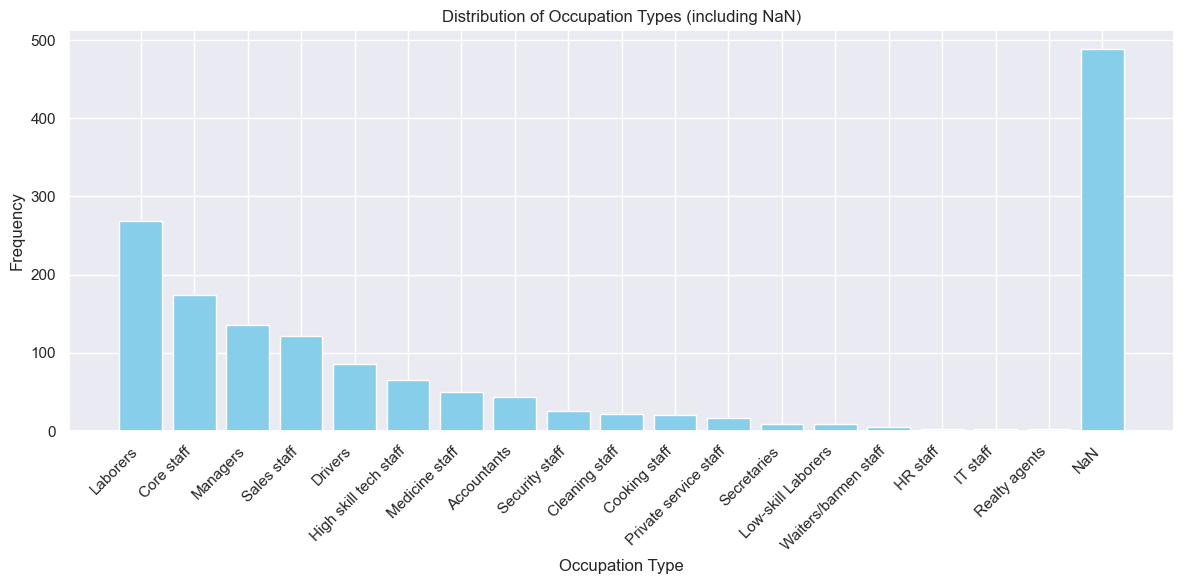

In [62]:
occupation_counts = credit_card['Type_occupation'].value_counts()
occupation_labels = occupation_counts.index
occupation_values = occupation_counts.values

# Check for NaN values and add them to the counts and labels
nan_count = len(credit_card) - credit_card['Type_occupation'].count()
if nan_count > 0:
    occupation_labels = np.append(occupation_labels, 'NaN')
    occupation_values = np.append(occupation_values, nan_count)

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(occupation_labels, occupation_values, color='skyblue')
plt.xlabel('Occupation Type')
plt.ylabel('Frequency')
plt.title('Distribution of Occupation Types (including NaN)')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

Interpretation:

- The most prolific Job title is laborers by far
- We have 31.52% missing data

label                    0   1  Approval Count  Rejection Count
Type_occupation                                                
Accountants             39   5              39                5
Cleaning staff          20   2              20                2
Cooking staff           17   4              17                4
Core staff             151  23             151               23
Drivers                 77   9              77                9
HR staff                 3   0               3                0
High skill tech staff   58   7              58                7
IT staff                 0   2               0                2
Laborers               240  28             240               28
Low-skill Laborers       7   2               7                2
Managers               122  14             122               14
Medicine staff          47   3              47                3
Private service staff   17   0              17                0
Realty agents            2   0          

<Figure size 1200x800 with 0 Axes>

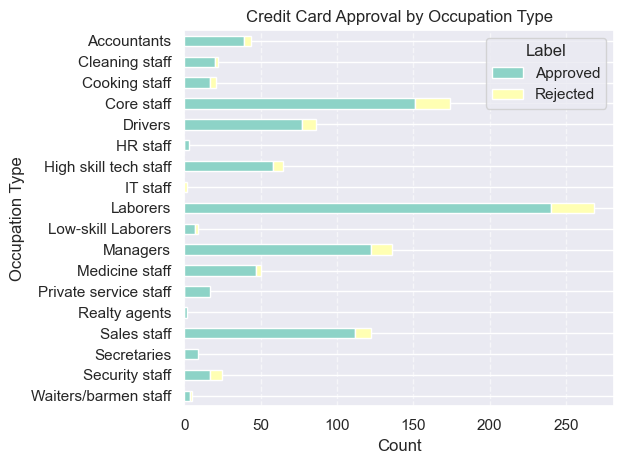

In [63]:
# Create a cross-tabulation between 'Type_occupation' and 'label'
cross_table = pd.crosstab(credit_card['Type_occupation'], credit_card['label'])

# Calculate approval and rejection counts within each occupation type
cross_table['Approval Count'] = cross_table[0]
cross_table['Rejection Count'] = cross_table[1]
print(cross_table)
# Create a bar plot to visualize the relationship
plt.figure(figsize=(12, 8))  # Adjust the figure size
sns.set_palette("Set3")

# Plot the data as horizontal bars for better readability
cross_table[['Approval Count', 'Rejection Count']].plot(kind='barh', stacked=True)

# Customize the plot
plt.title('Credit Card Approval by Occupation Type')
plt.ylabel('Occupation Type')  # Switched x and y axis labels for horizontal bars
plt.xlabel('Count')
plt.legend(title='Label', labels=['Approved', 'Rejected'], loc='upper right')  # Move the legend to a better position

# Show the plot
plt.tight_layout()  # Improve spacing and alignment
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Add horizontal grid lines
plt.gca().invert_yaxis()  # Reverse the y-axis to display the highest category at the top
plt.show()


Interpretation:

- Accountants and High-Skill Tech Staff have relatively high approval rates.
- Laborers and core staff face a mixed scenario with a significant number of approvals but also notable rejections, suggesting diverse credit profiles within this group.
- IT Staff, surprisingly, have zero approvals, possibly due to factors like limited credit history. 

# 2.1.17. Family Memebers

In [64]:
column_summary(credit_card,'Family_members')

Column Name: Family_members
**************************************************
Description (Numerical):
count    1548.000000
mean        2.161499
std         0.947772
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: Family_members, dtype: float64
**************************************************
Object Type:
int64
**************************************************
Value count:
    Count  Frequency (%)
2     802      51.808786
1     334      21.576227
3     268      17.312661
4     127       8.204134
5      15       0.968992
6       1       0.064599
15      1       0.064599


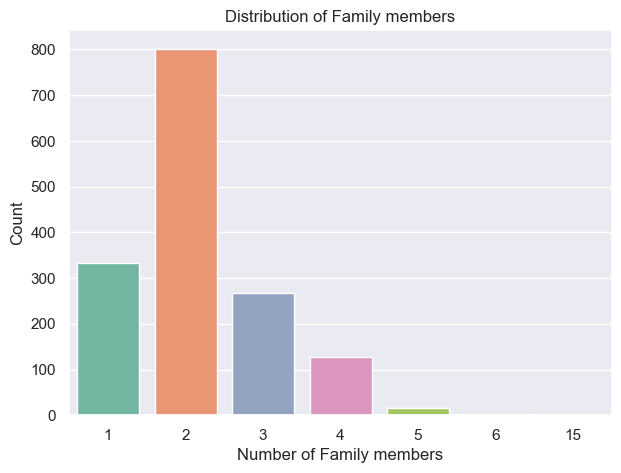

In [65]:
#Create a count plot for 'Children' column
sns.set(style="darkgrid")  # Set the style of the plot
plt.figure(figsize=(7, 5))  # Set the figure size

sns.countplot(data=credit_card, x="Family_members", palette="Set2")
plt.title("Distribution of Family members")
plt.xlabel("Number of Family members")
plt.ylabel("Count")

# Show the plot
plt.show()

Interpretation:

- Most applicants are two in their household, this is also confirmed with the fact that most don’t have a child (more on this in a bit)
- We also have 1 extreme value with 15 members in their household

label             0   1
Family_members         
1               295  39
2               706  96
3               239  29
4               117  10
5                15   0
6                 0   1
15                1   0


<Figure size 1000x600 with 0 Axes>

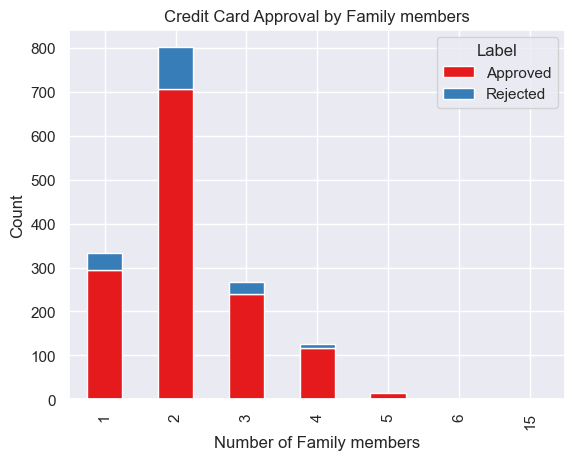

In [66]:
# Create a cross-tabulation between 'Children' and 'label'
cross_table = pd.crosstab(credit_card['Family_members'], credit_card['label'])
print(cross_table)
# Create a stacked bar plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.set_palette("Set1")
cross_table.plot(kind='bar', stacked=True)

# Customize the plot
plt.title('Credit Card Approval by Family members')
plt.xlabel('Number of Family members')
plt.ylabel('Count')
plt.legend(title='Label', labels=['Approved', 'Rejected'], loc='upper right')

# Show the plot
plt.show()

Interpretation:
    
- Family size appears to have a notable impact on credit card approval. Applicants with smaller families (1 or 2 family members) have a higher likelihood of credit card approval, as indicated by the significantly larger count of approvals compared to rejections within these categories.
- In contrast, as family size increases beyond two family members, the approval counts start to decrease while rejection counts remain relatively lower. This suggests that larger families (3 or more family members) may have a slightly lower approval rate.
- The family size category with the highest approval count is "2 family members," indicating that couples or small nuclear families tend to have a higher credit card approval rate.
- While larger families (e.g., with 4 or more family members) have relatively lower approval counts, it's important to note that the rejection counts are also low, suggesting that family size alone may not be the sole determinant in credit card approval decisions. Other factors likely play a role in these decisions.
- Also there is an extreme value with 15 family memebers

# 2.1.18 label(target variable)

In [67]:
column_summary(credit_card,'label')

Column Name: label
**************************************************
Description (Numerical):
count    1548.000000
mean        0.113049
std         0.316755
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: label, dtype: float64
**************************************************
Object Type:
int64
**************************************************
Value count:
   Count  Frequency (%)
0   1373       88.69509
1    175       11.30491


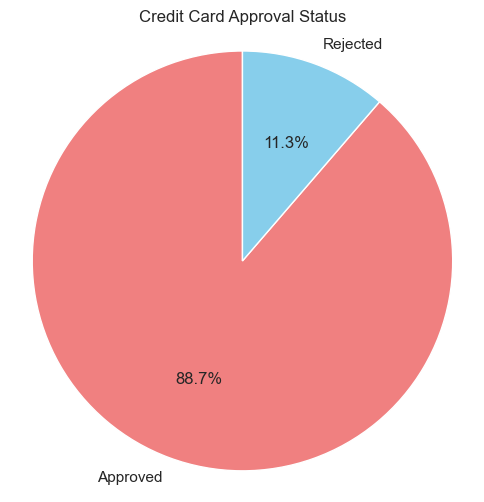

In [68]:
# Count the number of approved and rejected credit cards
label_counts = credit_card['label'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=['Approved', 'Rejected'], autopct='%1.1f%%', colors=['lightcoral', 'skyblue'], startangle=90)

# Customize the plot
plt.title('Credit Card Approval Status')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Show the plot
plt.show()

Interpretation:

- A vast majority of applicants are approved.
- We have a very imbalance data.

# 2.2. Bivariate and Multivariate Analysis

# 2.2.1. Pair plot for Numerical values

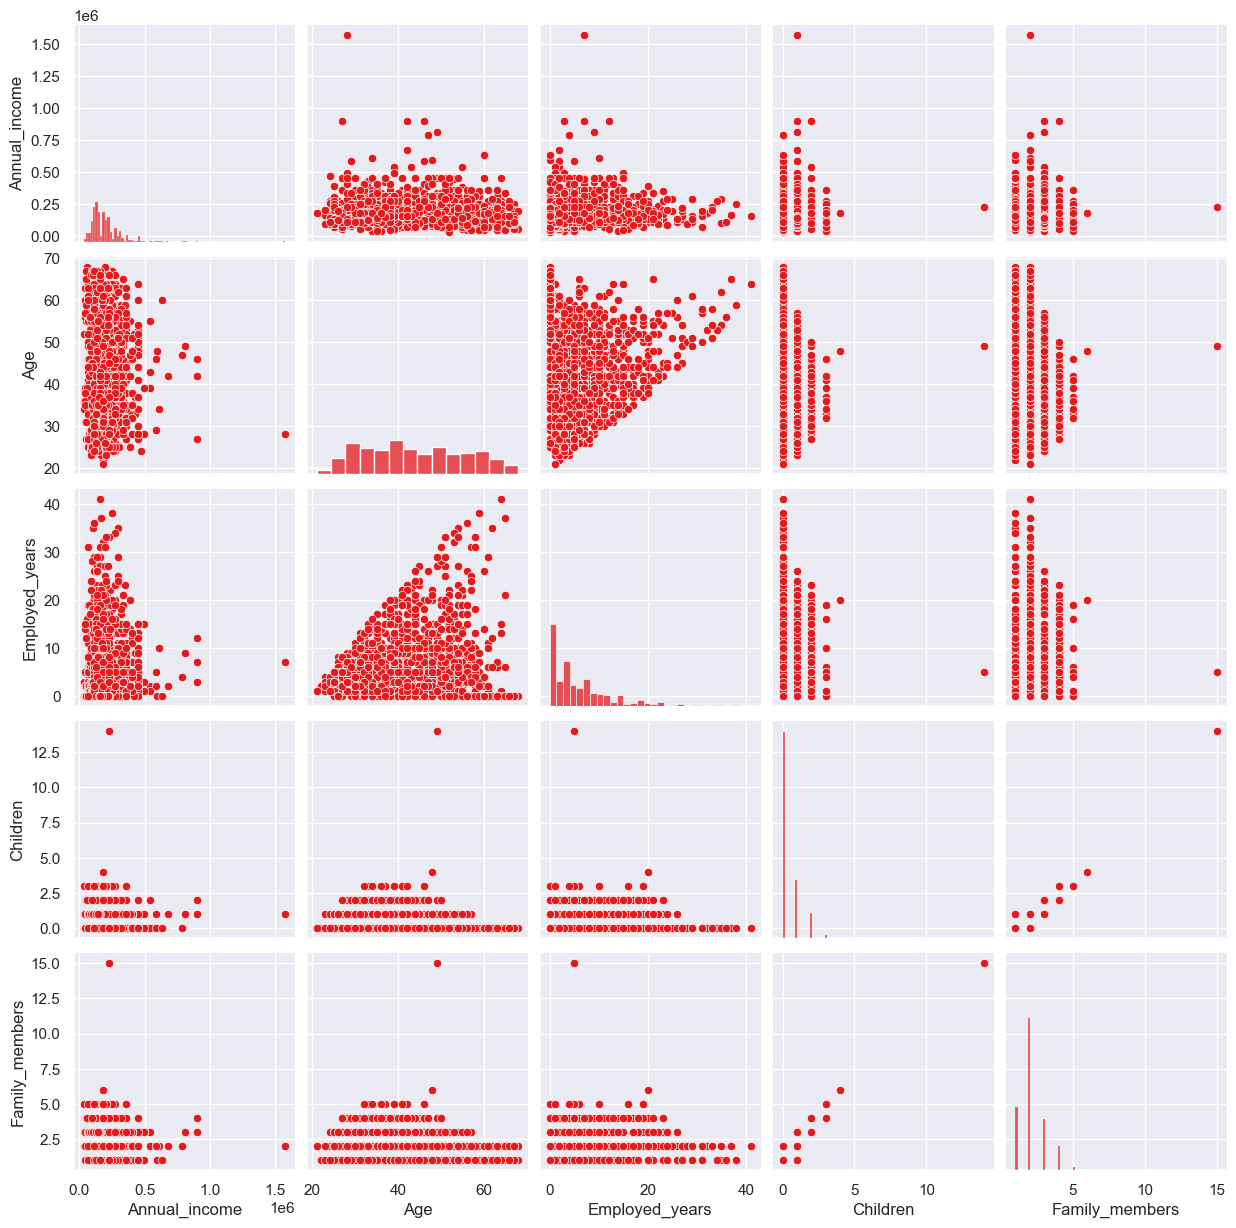

In [69]:
#create the pair plot 
numerical_columns = ['Annual_income', 'Age','Employed_years','Children','Family_members']  # Add the names of the numerical columns you want to include

# Select the specified numerical columns from your DataFrame
numerical_data = credit_card[numerical_columns]

# Create a pair plot using Seaborn
sns.pairplot(numerical_data)
plt.show()

Interpretation:

- We can see a positive linear correlation between the family member and the children count. This makes sense, the more the children someone have, the larger the family member count. This is a multicollinearity problem. Meaning that the features are highly correlated. We will need to drop one of them.
- Another interesting trend is the Employed years and Age. This also makes sense, the longer the employee has been working, the older they are.

# 2.2.2 Annual Income Distribution by Type Income, Education Level and Approval Status

In [70]:
# Create a box plot using Plotly Express with facet_col
fig = px.box(
    credit_card,
    x='Education',
    y='Annual_income',
    color='label',
    notched=True,
    facet_col='Type_income',  # Add facet_col for Type_income
    labels={'Education': 'Education Level', 'Annual_income': 'Annual Income'},
    title='Box Plot for Annual Income by Education Level and Label'
)

# Customize the x-axis labels for better visibility
fig.update_xaxes(tickangle=45)

# Adjust the figure size
fig.update_layout(width=1200, height=800)  # Adjust the figure size as needed

# Show the plot
fig.show()

Interpretation:

- For every type income applicants the approval rate is higher in higher eduacation and secondary and secondary special applicants and there income is also high.
- Mostly the outliers are in approval applicants.

# 2.2.3. Annual Income Distribution by Type Income, Employement years and Approval Status

In [71]:
# Create a box plot using Plotly Express with facet_col
fig = px.box(
    credit_card,
    x='Employed_years_bins',
    y='Annual_income',
    color='label',
    notched=True,
    facet_col='Type_income',  # Add facet_col for Type_income
    labels={'Employed_years_bins': 'Employement years', 'Annual_income': 'Annual Income'},
    title='Box Plot for Annual Income by Employement years and Label'
)

# Customize the x-axis labels for better visibility
fig.update_xaxes(tickangle=45)

# Adjust the figure size
fig.update_layout(width=1200, height=800)  # Adjust the figure size as needed

# Show the plot
fig.show()

# 2.2.4. Employed Year Distribution by Type income and Approval Status

In [72]:
# Create a box plot using Plotly Express with facet_col
fig = px.box(
    credit_card,
    x='Type_income',
    y='Employed_years',
    color='label',
    notched=True,
    labels={'Type_income': 'Type Of Income', 'Employed_years': 'Employement years'},
    title='Box Plot for Employed years by Education Level and Label'
)

# Customize the x-axis labels for better visibility
fig.update_xaxes(tickangle=45)

# Adjust the figure size
fig.update_layout(width=1000, height=800)  # Adjust the figure size as needed

# Show the plot
fig.show()

Interpretation:
    
- Suprisingly the Pensioner applicants has median of 0 employed years.
- State servants has the highest median of 9 years for approved applicants.

# 2.2.5. Employed Year Distribution by Education and Approval Status

In [73]:
# Create a box plot using Plotly Express with facet_col
fig = px.box(
    credit_card,
    x='Education',
    y='Employed_years',
    color='label',
    notched=True,
    labels={'Education': 'Education Level', 'Employed_years': 'Employement years'},
    title='Box Plot for Employed years by Education Level and Label'
)

# Customize the x-axis labels for better visibility
fig.update_xaxes(tickangle=45)

# Adjust the figure size
fig.update_layout(width=1000, height=800)  # Adjust the figure size as needed

# Show the plot
fig.show()

Interpretation:
    
- Academic degree dont have any rejections.
- Higher education and secondary/ secondary special have more number emplyement years in approval applicants.

# 2.2.6. Annual Income Distribution by Type Income, Housing Type  and Approval Status

In [74]:
# Create a box plot using Plotly Express with facet_col
fig = px.box(
    credit_card,
    x='Housing_type',
    y='Annual_income',
    color='label',
    notched=True,
    facet_col='Type_income',
     labels={'Housing_type': 'Type of housing', 'Annual_income': 'Anuual Income'},
    title='Box Plot for Annual Income by Type Income,Housing Type  and Label')

# Customize the x-axis labels for better visibility
fig.update_xaxes(tickangle=45)

# Adjust the figure size
fig.update_layout(width=1200, height=800)  # Adjust the figure size as needed

# Show the plot
fig.show()

Interpretation:
    
- For pensioner type income most of the applicants have rejection and approval in house and apartment type of housing.
- For commercial associate applicants who are living in office apartment have higher approval rate.
- For working applicants who are living in House/apartment,office apartment and rented apartments has more approval rate.
- For State servant applicants who are living in house /aprtments,with parents and municipal apartment

# 2.2.7. Annual Income Distribution by Property Owner, Car Owner  and Approval Status

In [75]:
# Create a box plot using Plotly Express with facet_col
fig = px.box(
    credit_card,
    x='Property_owner',
    y='Annual_income',
    color='label',
    notched=True,
    facet_col='Car_owner',
     labels={'Housing_type': 'Type of housing', 'Annual_income': 'Anuual Income'},
    title='Box Plot for Annual Income by Education Level and Label')

# Customize the x-axis labels for better visibility
fig.update_xaxes(tickangle=45)

# Adjust the figure size
fig.update_layout(width=1200, height=800)  # Adjust the figure size as needed

# Show the plot
fig.show()

# 2.2.8. Annual Income Distribution by Family Members, Children  and Approval Status

In [76]:
# Filter the DataFrame to exclude Family_members 6 and 15
filtered_df = credit_card[~credit_card['Family_members'].isin([6, 15])]

# Create a box plot with facets for 'Children' and 'Family_members'
fig = px.box(
    filtered_df,  # Use the filtered DataFrame
    x='Children',
    y='Annual_income',
    color='label',
    facet_col='Family_members',  # Facet by 'Family_members'
    notched=True,
    labels={'Children': 'Children', 'Annual_income': 'Annual Income'},
    title='Box Plot for Annual Income by Children, Faceted by Family Members and Label'
)

# Customize the layout
fig.update_xaxes(tickangle=45)
fig.update_layout(width=1500, height=600)

# Show the plot
fig.show()

# 2.2.9. Age Distribution by Employed Years,Type Income and Approval Status

In [77]:
# Create a box plot using Plotly Express with facet_col
fig = px.box(
    credit_card,
    x='Employed_years_bins',
    y='Age',
    color='label',
    notched=True,
    facet_col='Type_income',
     labels={'Employed_years_bins': 'Employed Years'},
    title='Box Plot for Annual Income by Education Level and Label')

# Customize the x-axis labels for better visibility
fig.update_xaxes(tickangle=45)

# Adjust the figure size
fig.update_layout(width=1500, height= 700)  # Adjust the figure size as needed

# Show the plot
fig.show()

# 2.2.10. Age Distribution by Marital Status,Family Member and Approval Status

In [78]:
# Create a box plot with facets for 'Marital_status' and 'Family_members', excluding 6 and 15
fig = px.box(
    credit_card[(credit_card['Family_members'] != 6) & (credit_card['Family_members'] != 15)],
    x='Marital_status',
    y='Age',
    color='label',
    notched=True,
    facet_col='Family_members',
    labels={'Marital_status': 'Marital Status', 'Age': 'Age'},
    title='Box Plot for Age by Marital Status, Faceted by Family Members and Label'
)

# Customize the x-axis labels for better visibility
fig.update_xaxes(tickangle=45)

# Adjust the figure size
fig.update_layout(width=1700, height=700)  # Adjust the figure size as needed

# Show the plot
fig.show()


# 2.2.11. Annual Income Distribution by Age Group, Employed years  and Approval Status

In [79]:
# Create a box plot with facets for 'Employed_years_bins' and 'Annual_income', faceted by 'Age_Group'
fig = px.box(
    credit_card[credit_card['Age_Group'].notna()],  # Filter rows where 'Age_Group' is not 'nan'
    x='Employed_years_bins',
    y='Annual_income',
    color='label',
    notched=True,
    facet_col='Age_Group',  # Add facet_col for Age_Group
    labels={'Employed_years_bins': 'Employed Years', 'Annual_income': 'Annual Income'},
    title='Box Plot for Annual Income by Employed Years and Label, Faceted by Age Group'
)

# Customize the x-axis labels for better visibility
fig.update_xaxes(tickangle=45)

# Adjust the figure size
fig.update_layout(width=1700, height=800)  # Adjust the figure size

# 2.2.12. Annual Income Distribution by Occupation type and Approval Status

In [80]:
# Create a box plot with facets for 'Employed_years_bins' and 'Annual_income', faceted by 'Age_Group'
fig = px.box(
    credit_card,  # Filter rows where 'Age_Group' is not 'nan'
    x='Type_occupation',
    y='Annual_income',
    color='label',
    notched=True,
    labels={'Type_occupation': 'Type of occupation', 'Annual_income': 'Annual Income'},
    title='Box Plot for Annual Income by Type of occupation and Labe'
)

# Customize the x-axis labels for better visibility
fig.update_xaxes(tickangle=45)

# Adjust the figure size
fig.update_layout(width=1700, height=800)  # Adjust the figure size

# 2.2.13. Employed years distribution by Occupation type and label

In [81]:
# Create a box plot with facets for 'Employed_years_bins' and 'Annual_income', faceted by 'Age_Group'
fig = px.box(
    credit_card,  # Filter rows where 'Age_Group' is not 'nan'
    x='Type_occupation',
    y='Employed_years',
    color='label',
    notched=True,
    labels={'Type_occupation': 'Type of occupation', 'Employed_years': 'Employed_years'},
    title='Box Plot for Annual Income by Type of occupation and Labe'
)

# Customize the x-axis labels for better visibility
fig.update_xaxes(tickangle=45)

# Adjust the figure size
fig.update_layout(width=1700, height=800)  # Adjust the figure size

# 2.2.14. Family member count vs children count (numerical vs numerical feature comparison)

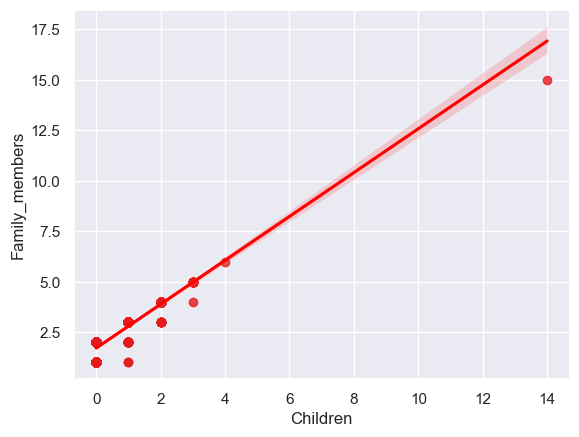

In [82]:
sns.regplot(x='Children',y='Family_members',data=credit_card,line_kws={'color': 'red'})
plt.show()

Interpretation:

- The more children a person has, the larger the family member count.

# 3.1. Data cleaning 

# 3.1.1. Duplicate Values

In [83]:
# Check for duplicate rows in the 'credit_card' DataFrame
duplicate_count = credit_card.duplicated().sum()

# Print the number of duplicate rows
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


- Dropping the binning columns crated for analysis

In [84]:
# Drop the specified columns from the DataFrame
credit_card = credit_card.drop(['Income_Category', 'Age_Group', 'Employed_years_bins'], axis=1)

In [85]:
#Checking all the unique values in dataset
credit_card.nunique()

Ind_ID             1548
Gender                2
Car_owner             2
Property_owner        2
Children              6
Annual_income       115
Type_income           4
Education             5
Marital_status        5
Housing_type          6
Age                  48
Employed_years       39
Mobile_phone          1
Work_phone            2
Phone                 2
Email_id              2
Type_occupation      18
Family_members        7
Unnamed: 18           0
label                 2
dtype: int64

# 3.2.1. Null Values

In [86]:
# Check for missing values (NaN) in each column of the 'credit_card' DataFrame
# and return the sum of missing values for each column.
missing_values = credit_card.isnull().sum()
print(missing_values)

Ind_ID                0
Gender                7
Car_owner             0
Property_owner        0
Children              0
Annual_income        23
Type_income           0
Education             0
Marital_status        0
Housing_type          0
Age                  22
Employed_years        0
Mobile_phone          0
Work_phone            0
Phone                 0
Email_id              0
Type_occupation     488
Family_members        0
Unnamed: 18        1548
label                 0
dtype: int64


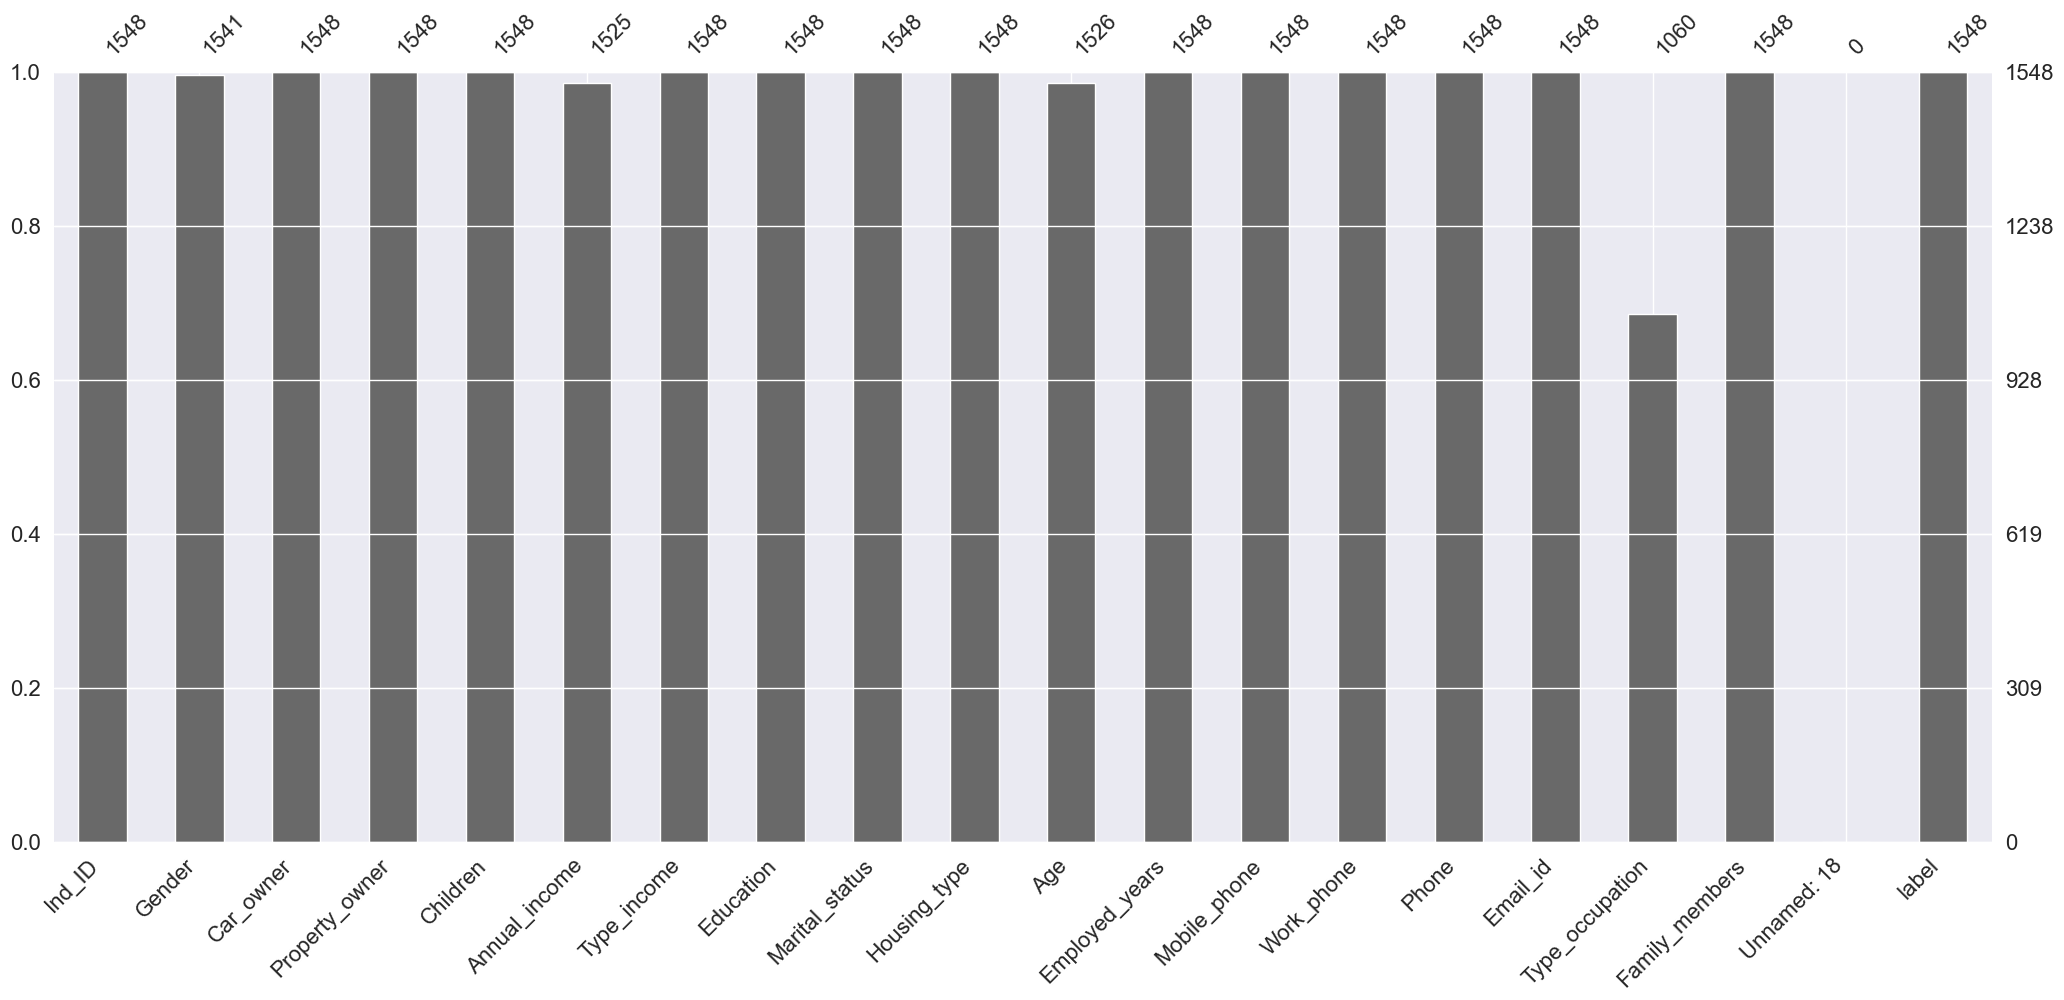

In [87]:
# Import the missingno library for missing data visualization
import missingno as msno

# Create a bar plot to visualize missing values in the 'credit_card' DataFrame
msno.bar(credit_card)

# Display the plot
plt.show()

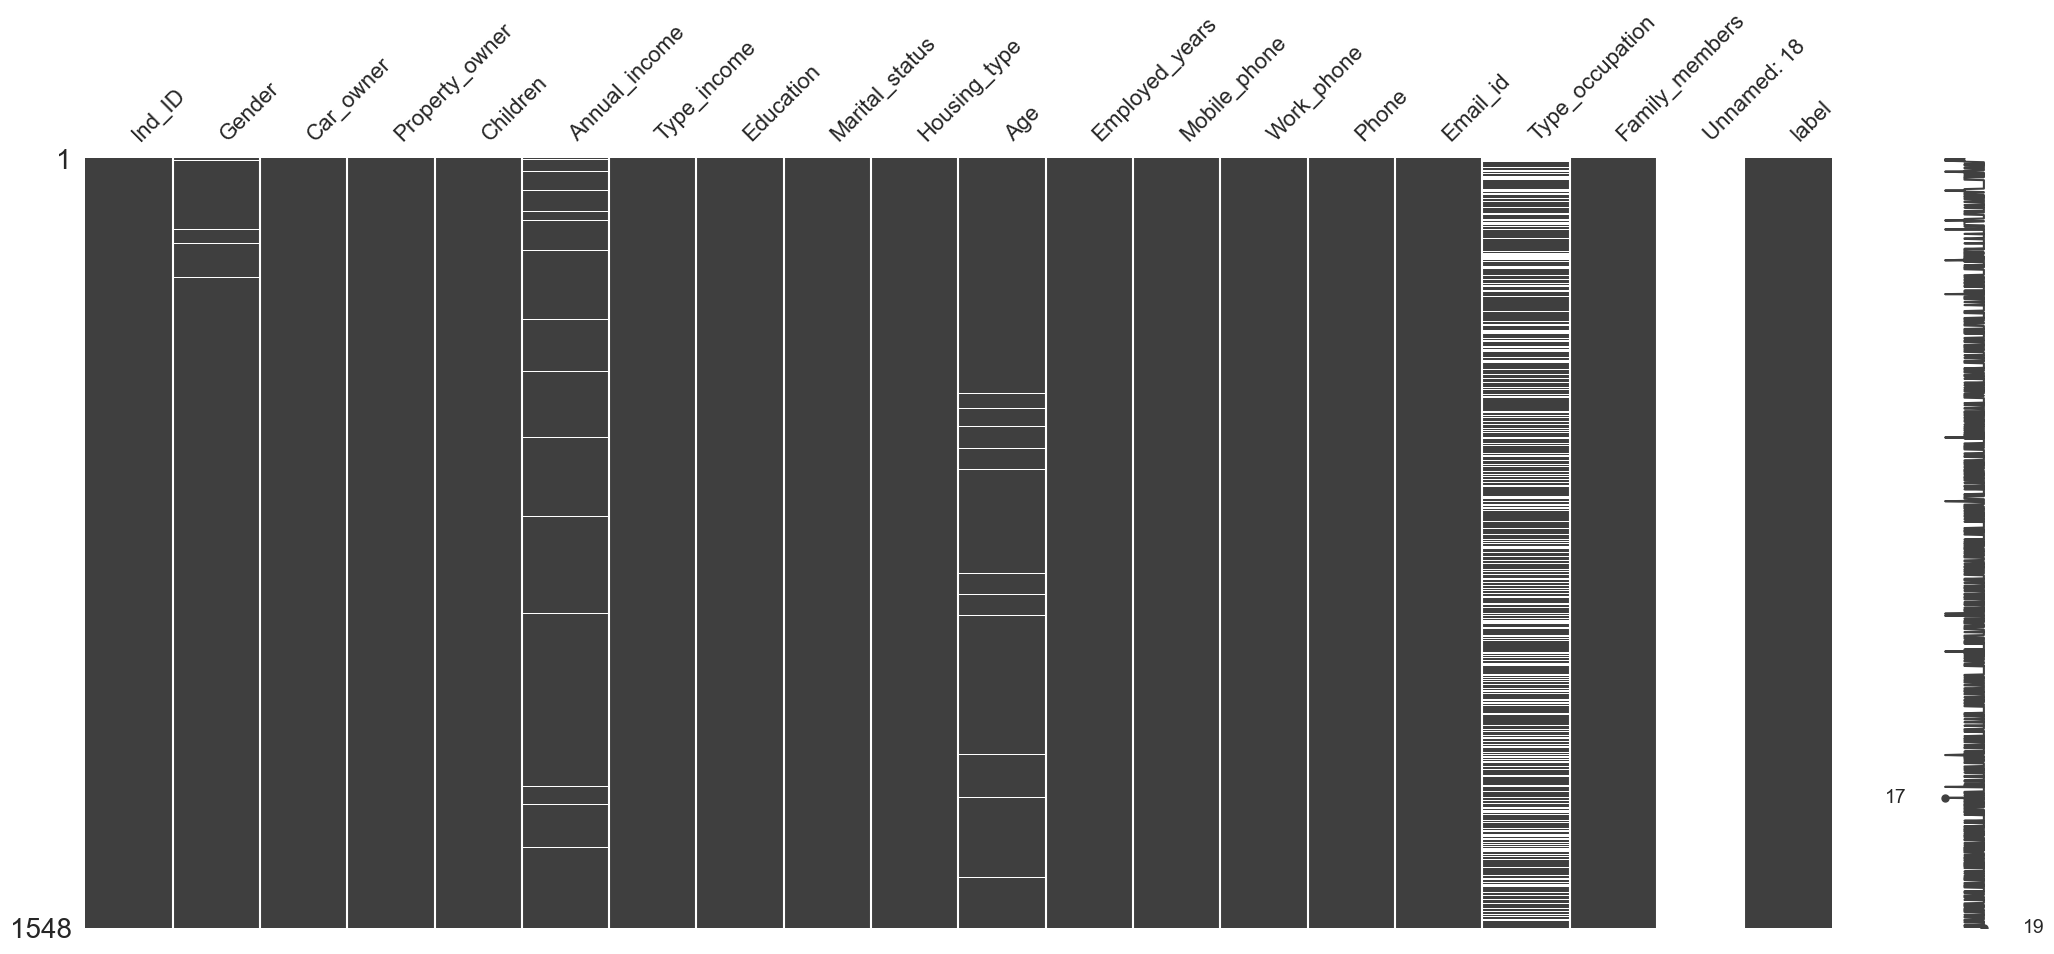

In [88]:
# Create a matrix plot to visualize missing values in the 'credit_card' DataFrame
msno.matrix(credit_card)

# Display the plot
plt.show()

<AxesSubplot:>

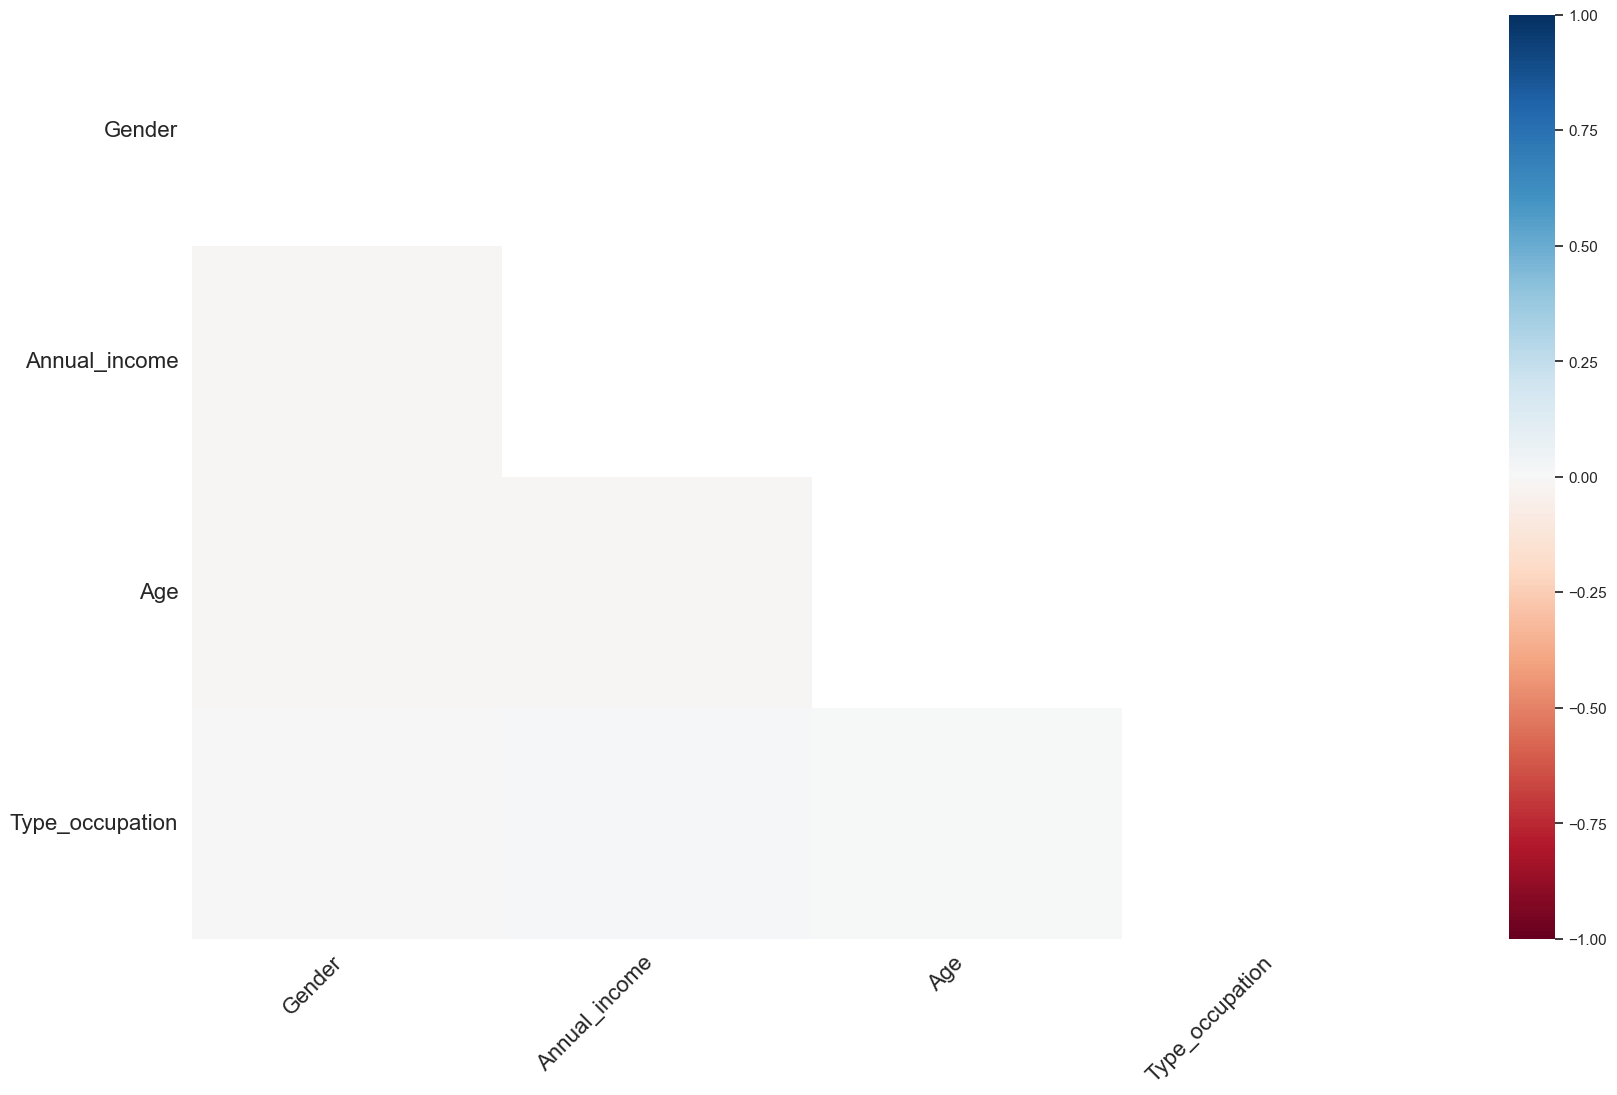

In [89]:
msno.heatmap(credit_card)

- Columns like 'GENDER' have 7 missing values, while 'Annual_income' has 23 missing values.
- 'Birthday Count' has 22 missing values
- 'Type_Occupation' has the most missing values with 488 entries and missing values scattered randomly (MCAR)
- 'Unnamed: 18' has 1548 missing values.
- Heatmap also shows that there is not any pattern or realtionship in missing values

# 3.2.2. Imputation of missing values

# Gender 

In [90]:
# Calculate the mode
gender_mode = credit_card['Gender'].mode()[0]

# Fill missing values with the mode
credit_card['Gender'].fillna(gender_mode, inplace=True)

- Imputed missing 'GENDER' values with the most frequent (mode) gender category

# Annual income 

In [91]:
# Calculate the median of the 'Annual_income' column
annual_income_median = credit_card['Annual_income'].median()

# Fill missing values with the median
credit_card['Annual_income'].fillna(annual_income_median, inplace=True)

- Filled missing 'Annual_income' values with the median to mitigate the impact of outliers.

# Age

In [92]:
# Calculate the rounded mean of the 'Age' column
rounded_age_mean = round(credit_card['Age'].mean())

# Fill missing values with the rounded mean
credit_card['Age'].fillna(rounded_age_mean, inplace=True)


# Type_occupation

In [93]:
# Specify the column name you want to analyze
column_name = 'Type_occupation'

# Calculate the percentage of missing values in the specified column
missing_percentage = (credit_card[column_name].isnull().sum() / len(credit_card)) * 100

# Print the result
print(f"Percentage of missing values in '{column_name}': {missing_percentage:.2f}%")

Percentage of missing values in 'Type_occupation': 31.52%


- The 'Type_Occupation' column has more than 30 percent missing values.

# 3.3.Extreme Values in categorical columns

# Children

In [94]:
credit_card['Children'].value_counts()

0     1091
1      305
2      134
3       16
4        1
14       1
Name: Children, dtype: int64

In [95]:
# Replace '14' with the maximum value '4'
credit_card['Children'] = credit_card['Children'].replace(14, 4)

# Verify the changes
print(credit_card['Children'].value_counts())

0    1091
1     305
2     134
3      16
4       2
Name: Children, dtype: int64


# Family members

In [96]:
credit_card['Family_members'].value_counts()

2     802
1     334
3     268
4     127
5      15
6       1
15      1
Name: Family_members, dtype: int64

In [97]:
# Replace '15' with the maximum value '6'
credit_card['Family_members'] = credit_card['Family_members'].replace(15, 6)

# Verify the changes
print(credit_card['Family_members'].value_counts())

2    802
1    334
3    268
4    127
5     15
6      2
Name: Family_members, dtype: int64


# 3.4. Outlier Treatment

# 3.4.1. Annual_income

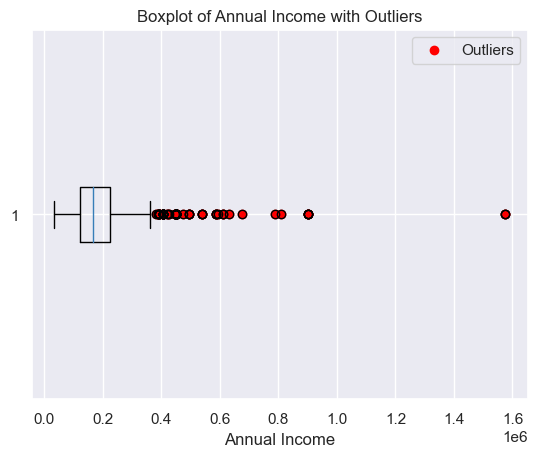

In [98]:
# Create a boxplot of the 'Annual_income' column
plt.boxplot(credit_card['Annual_income'], vert=False)  # vert=False for horizontal boxplot

# Label the outliers with red color
outliers = credit_card['Annual_income'][credit_card['Annual_income'] > credit_card['Annual_income'].quantile(0.75) + 1.5 * (credit_card['Annual_income'].quantile(0.75) - credit_card['Annual_income'].quantile(0.25))]
plt.scatter(outliers, [1] * len(outliers), color='red', marker='o', label='Outliers')

# Customize plot labels and title
plt.xlabel('Annual Income')
plt.title('Boxplot of Annual Income with Outliers')

# Show the plot
plt.legend()
plt.show()


In [99]:
# Calculate the IQR (Interquartile Range) for 'Annual_income'
Q1 = credit_card['Annual_income'].quantile(0.25)
Q3 = credit_card['Annual_income'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find and retrieve the outliers
outliers = credit_card[(credit_card['Annual_income'] < lower_bound) | (credit_card['Annual_income'] > upper_bound)]

# Display the 'Annual_income' column for outliers and their count
print("Outliers in 'Annual_income' column:")
print(outliers['Annual_income'])
print(f"Number of outliers: {len(outliers)}")

Outliers in 'Annual_income' column:
8       450000.0
9       450000.0
10      450000.0
14      472500.0
25      540000.0
          ...   
1457    405000.0
1467    450000.0
1479    450000.0
1495    405000.0
1538    450000.0
Name: Annual_income, Length: 73, dtype: float64
Number of outliers: 73


- Treating the outliers in annual income column by capping 

In [100]:
#Calculate the 90th percentile value for 'Annual_income'
percentile_95 = credit_card['Annual_income'].quantile(0.95)

# Cap the upper outliers to the 90th percentile value
credit_card['Annual_income'] = credit_card['Annual_income'].apply(lambda x: percentile_95 if x > percentile_95 else x)

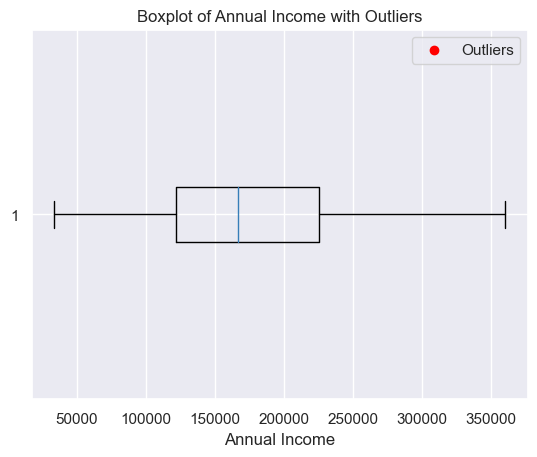

In [101]:
# Create a boxplot of the 'Annual_income' column
plt.boxplot(credit_card['Annual_income'], vert=False)  # vert=False for horizontal boxplot

# Label the outliers with red color
outliers = credit_card['Annual_income'][credit_card['Annual_income'] > credit_card['Annual_income'].quantile(0.75) + 1.5 * (credit_card['Annual_income'].quantile(0.75) - credit_card['Annual_income'].quantile(0.25))]
plt.scatter(outliers, [1] * len(outliers), color='red', marker='o', label='Outliers')

# Customize plot labels and title
plt.xlabel('Annual Income')
plt.title('Boxplot of Annual Income with Outliers')

# Show the plot
plt.legend()
plt.show()


# 3.4.2 Employed years

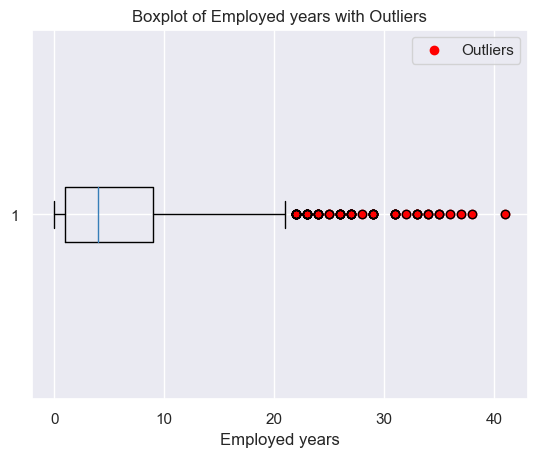

In [102]:
# Create a boxplot of the 'Employed_years' column
plt.boxplot(credit_card['Employed_years'], vert=False)  # vert=False for horizontal boxplot

# Label the outliers with red color
outliers = credit_card['Employed_years'][credit_card['Employed_years'] > credit_card['Employed_years'].quantile(0.75) + 1.5 * (credit_card['Employed_years'].quantile(0.75) - credit_card['Employed_years'].quantile(0.25))]
plt.scatter(outliers, [1] * len(outliers), color='red', marker='o', label='Outliers')

# Customize plot labels and title
plt.xlabel('Employed years')
plt.title('Boxplot of Employed years with Outliers')

# Show the plot
plt.legend()
plt.show()

In [103]:
# Calculate the IQR (Interquartile Range) for 'Employed_years'
Q1 = credit_card['Employed_years'].quantile(0.25)
Q3 = credit_card['Employed_years'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find and retrieve the outliers
outliers = credit_card[(credit_card['Employed_years'] < lower_bound) | (credit_card['Employed_years'] > upper_bound)]

# Display the 'Employed_years' column for outliers and their count
print("Outliers in 'Employed_years' column:")
print(outliers['Employed_years'])
print(f"Number of outliers: {len(outliers)}")

Outliers in 'Employed_years' column:
62      23
63      23
104     22
178     26
247     24
275     34
282     26
311     37
316     27
332     23
347     41
363     22
373     24
399     35
476     22
501     23
519     26
525     27
530     23
542     31
588     32
652     27
687     23
734     23
783     25
797     29
821     22
832     38
839     33
841     25
849     22
852     26
880     22
881     27
958     22
987     29
988     34
992     23
1000    31
1054    33
1070    26
1074    28
1139    23
1171    22
1186    33
1195    22
1235    24
1240    29
1262    31
1288    31
1301    24
1322    35
1361    36
1369    24
1378    22
1428    29
1439    29
1445    27
Name: Employed_years, dtype: int64
Number of outliers: 58


- Treating the Outliers in Employed Years

In [104]:
# Calculate the 95th percentile value for 'Employed_years'
percentile_95 = credit_card['Employed_years'].quantile(0.95)

# Cap the upper outliers to the 90th percentile value
credit_card['Employed_years'] = credit_card['Employed_years'].apply(lambda x: percentile_95 if x > percentile_95 else x)

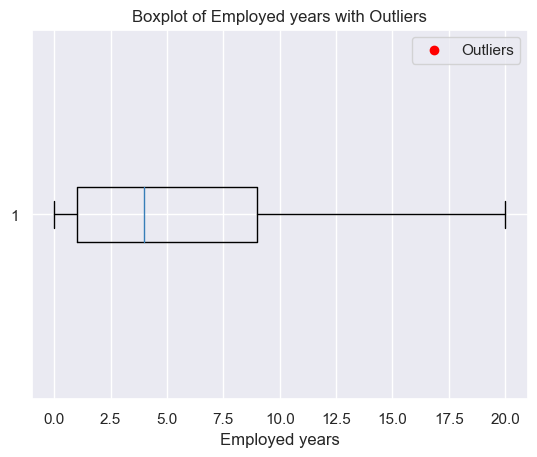

In [105]:
# Create a boxplot of the 'Employed_years' column
plt.boxplot(credit_card['Employed_years'], vert=False)  # vert=False for horizontal boxplot

# Label the outliers with red color
outliers = credit_card['Employed_years'][credit_card['Employed_years'] > credit_card['Employed_years'].quantile(0.75) + 1.5 * (credit_card['Employed_years'].quantile(0.75) - credit_card['Employed_years'].quantile(0.25))]
plt.scatter(outliers, [1] * len(outliers), color='red', marker='o', label='Outliers')

# Customize plot labels and title
plt.xlabel('Employed years')
plt.title('Boxplot of Employed years with Outliers')

# Show the plot
plt.legend()
plt.show()

# 4. Data Transformation

# 4.1. Annual Income

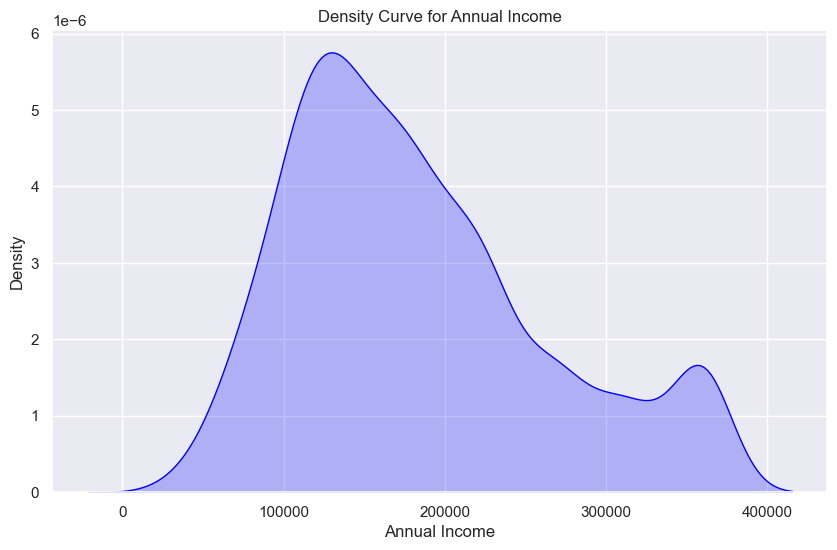

In [106]:
# Create a density plot (KDE) for 'Annual_income'
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Plot the density curve
sns.kdeplot(credit_card['Annual_income'], color='blue', shade=True)  # You can adjust the color as needed

# Customize plot labels and title
plt.xlabel('Annual Income')
plt.ylabel('Density')
plt.title('Density Curve for Annual Income')

# Show the plot
plt.show()

In [107]:
credit_card['Annual_income'].skew()

0.7067497882839076

- Applying transformation technique on Annual income

In [108]:
# Assuming 'credit_card' is your DataFrame
credit_card['Annual_income'] = credit_card['Annual_income'] ** (1/4)


In [109]:
credit_card['Annual_income'].skew()

0.03417972178332527

# 4.2. Age

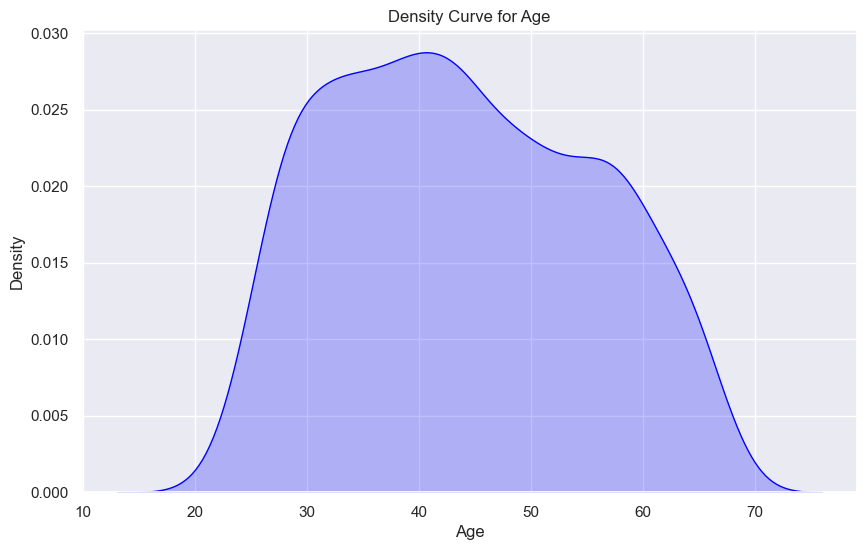

In [110]:
# Create a density plot (KDE) for 'Annual_income'
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Plot the density curve
sns.kdeplot(credit_card['Age'], color='blue', shade=True)  # You can adjust the color as needed

# Customize plot labels and title
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Density Curve for Age')

# Show the plot
plt.show()

In [111]:
credit_card['Age'].skew()

0.1707640793765575

- Applying the transformation on Age column 

In [112]:
#Applying the transformation on 'Age' column
credit_card['Age'] = np.sqrt(credit_card['Age'])

# 4.3. Employed years

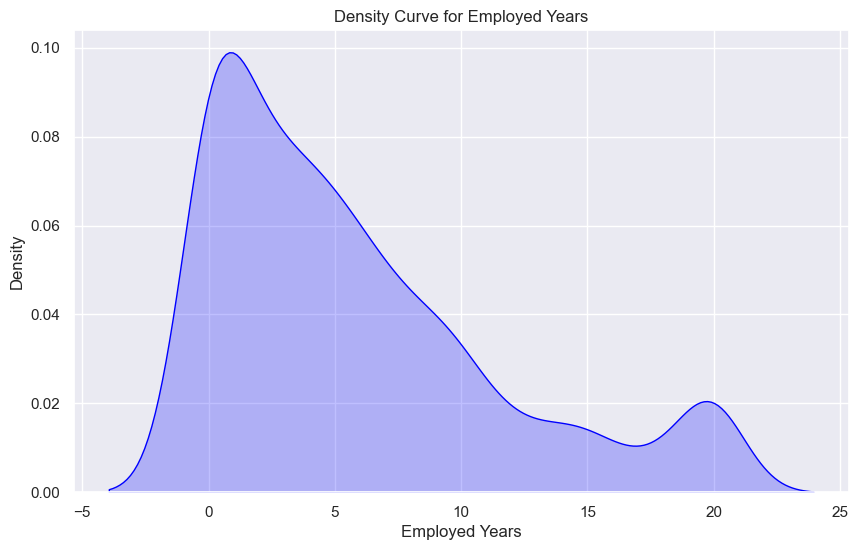

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a density plot (KDE) for 'Annual_income'
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Plot the density curve
sns.kdeplot(credit_card['Employed_years'], color='blue', shade=True)  # You can adjust the color as needed

# Customize plot labels and title
plt.xlabel('Employed Years')
plt.ylabel('Density')
plt.title('Density Curve for Employed Years')

# Show the plot
plt.show()

In [114]:
credit_card['Employed_years'].skew()

1.088936854770079

- Applying the transformation on 'Employed_years' columns

In [115]:
#Applying the transformation in 'Employed_years' column
credit_card['Employed_years'] = credit_card['Employed_years']**(1/2)


In [116]:
credit_card['Employed_years'].skew()

0.017273664495889338

# 5. Feature selection

# 5.1.Correlation Analysis(Numerical Features)

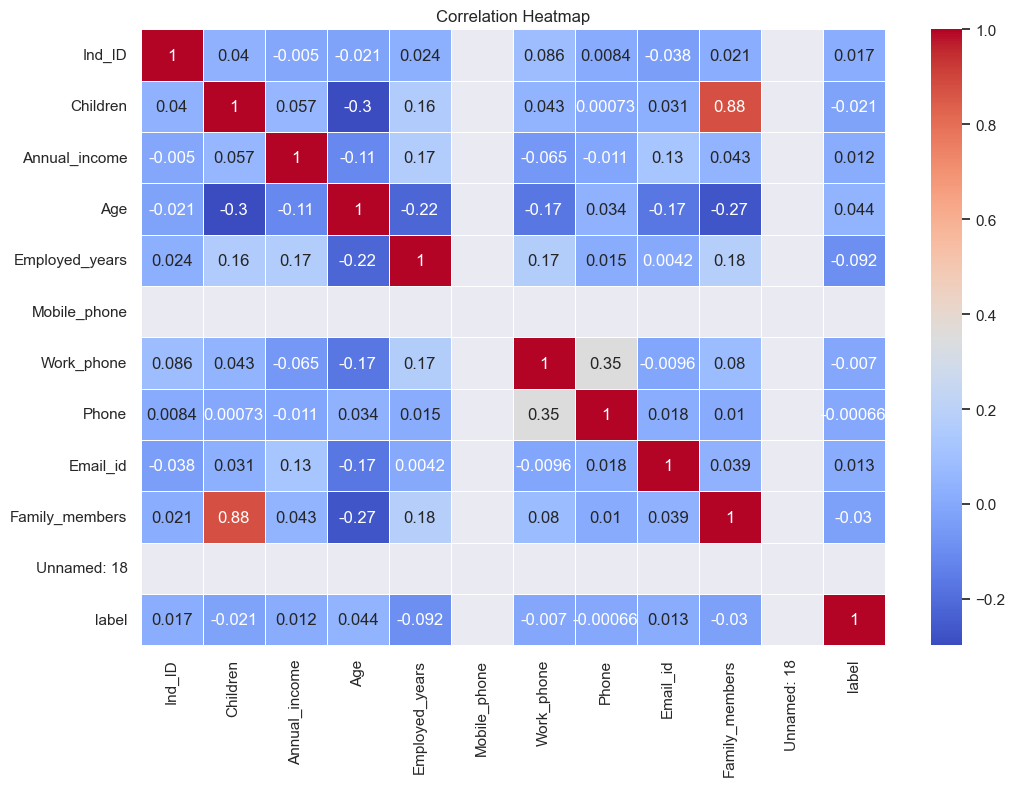

In [117]:
# Compute the correlation matrix
correlation_matrix = credit_card.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Interpretation:

- There is no feature that is correlated with the target feature
- Family member count is highly correlated with children count as previously discussed
- Another positive correlation is having a phone and having a work phone.
- We also have a negative correlation between the employment length and the age as previously seen.

In [118]:
from scipy import stats

# Access the 'Annual_income', 'Age', and 'Employed_years' columns
Annual_income = credit_card['Annual_income']
Age = credit_card['Age']
Employed_years = credit_card['Employed_years']

# Calculate the Pearson correlation and p-value for Annual_income and Age
corr1, p_value1 = stats.pearsonr(Annual_income, Age)

# Calculate the Pearson correlation and p-value for Annual_income and Employed_years
corr2, p_value2 = stats.pearsonr(Annual_income, Employed_years)

# Calculate the Pearson correlation and p-value for Age and Employed_years
corr3, p_value3 = stats.pearsonr(Age, Employed_years)

# Print the results for Annual_income and Age
print("Correlation (Annual_income vs. Age):", corr1)
print("P-Value (Annual_income vs. Age):", p_value1)

# Print the results for Annual_income and Employed_years
print("Correlation (Annual_income vs. Employed_years):", corr2)
print("P-Value (Annual_income vs. Employed_years):", p_value2)

# Print the results for Age and Employed_years
print("Correlation (Age vs. Employed_years):", corr3)
print("P-Value (Age vs. Employed_years):", p_value3)


Correlation (Annual_income vs. Age): -0.11219406719028197
P-Value (Annual_income vs. Age): 9.66012568678216e-06
Correlation (Annual_income vs. Employed_years): 0.1668412486365627
P-Value (Annual_income vs. Employed_years): 3.9657178977918797e-11
Correlation (Age vs. Employed_years): -0.22154091411468224
P-Value (Age vs. Employed_years): 1.152658362249972e-18


- Annual Income vs. Age: There is a weak negative correlation (-0.1122) between annual income and age, suggesting a slight tendency for income to decrease as individuals age. This relationship is statistically significant (p-value < 0.05), indicating it's unlikely to be due to chance.

- Annual Income vs. Employed Years: A weak positive correlation (0.1668) exists between annual income and the number of years employed, implying that individuals with more years of employment tend to have higher incomes. This relationship is highly statistically significant (p-value < 0.001).

- Age vs. Employed Years: A moderate negative correlation (-0.2215) is observed between age and the number of years employed, indicating that as individuals age, they tend to have fewer years of employment. This relationship is highly statistically significant (p-value < 0.001).

# 5.3. Independent sample t test (Continuous variable with target variable)

In [119]:
import pandas as pd
from scipy import stats

# Assuming 'credit_card' is your DataFrame

# Define the variables and their interpretations
variables = {
    'Annual_income': 'Annual_income',
    'Age': 'Age',
    'Employed_years': 'Employed_years',
}

# Iterate through the variables
for variable, interpretation in variables.items():
    # Split the data into two groups based on the 'label' column
    approval_group = credit_card[credit_card['label'] == 0][variable]
    rejection_group = credit_card[credit_card['label'] == 1][variable]

    # Perform independent sample t-test
    t_statistic, p_value = stats.ttest_ind(approval_group, rejection_group)

    # Print the results
    print(f"{variable} T-Statistic:", t_statistic)
    print(f"{variable} P-Value:", p_value)

    # Interpret the results based on the p-value
    if p_value < 0.05:
        print(f"There is a statistically significant difference in {interpretation} between approval and rejection groups.")
    else:
        print(f"There is no statistically significant difference in {interpretation} between approval and rejection groups.")
    
    print()  # Add a blank line for separation


Annual_income T-Statistic: -0.46774329912541446
Annual_income P-Value: 0.6400340985760955
There is no statistically significant difference in Annual_income between approval and rejection groups.

Age T-Statistic: -1.7206056994679606
Age P-Value: 0.08552249309266552
There is no statistically significant difference in Age between approval and rejection groups.

Employed_years T-Statistic: 3.62506381809623
Employed_years P-Value: 0.00029825460192305466
There is a statistically significant difference in Employed_years between approval and rejection groups.



- Annual_income: The t-test results indicate that there is no statistically significant difference in Annual_income between the approval and rejection groups. This means that, based on the given data and the chosen significance level (usually 0.05), there is no strong evidence to suggest that Annual_income significantly differs between those who received approval and those who were rejected for a credit card.

- Age: The t-test results for Age also suggest that there is no statistically significant difference in Age between the approval and rejection groups. Similar to Annual_income, there is no strong evidence to suggest a significant Age difference between the two groups.

- Employed_years: In contrast, the t-test for Employed_years indicates that there is a statistically significant difference in Employed_years between the approval and rejection groups. The p-value is less than 0.05, suggesting that there is strong evidence to support the claim that the length of employment (Employed_years) differs significantly between those who received approval and those who were rejected for a credit card.

# 5.4. Chi Square Test(Categorical variables with target variables)

In [120]:
from scipy.stats import chi2_contingency



# List of categorical columns to test
categorical_columns = ['Gender', 'Car_owner', 'Property_owner', 'Children',
                       'Type_income', 'Education', 'Marital_status', 'Housing_type',
                       'Mobile_phone', 'Work_phone', 'Phone', 'Email_id', 'Type_occupation',
                       'Family_members']

# Create an empty list to store the chi-squared test results
chi_squared_results = []

# Perform chi-squared test for each categorical feature
for feature in categorical_columns:
    contingency_table = pd.crosstab(credit_card[feature], credit_card['label'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    significant = 'Yes' if p < 0.05 else 'No'
    chi_squared_results.append({'Feature': feature, 'Chi-Square': chi2, 'P-Value': p, 'Significant': significant})

# Create a DataFrame from the results
chi_squared_results_df = pd.DataFrame(chi_squared_results)

# Print the results
print(chi_squared_results_df)

            Feature  Chi-Square   P-Value Significant
0            Gender    2.935630  0.086645          No
1         Car_owner    0.247884  0.618569          No
2    Property_owner    0.384679  0.535110          No
3          Children    5.904146  0.206422          No
4       Type_income   13.598556  0.003506         Yes
5         Education    9.205670  0.056159          No
6    Marital_status   10.524108  0.032467         Yes
7      Housing_type   28.042795  0.000036         Yes
8      Mobile_phone    0.000000  1.000000          No
9        Work_phone    0.031804  0.858458          No
10            Phone    0.000000  1.000000          No
11         Email_id    0.136738  0.711545          No
12  Type_occupation   37.225476  0.003136         Yes
13   Family_members    6.851904  0.231889          No


- Type of Income: The type of income is significantly associated with credit card approval/rejection. Different income sources may influence credit card decisions.

- Marital Status: Marital status is also significantly associated with credit card approval/rejection. It appears to play a role in credit card decisions.

- Housing Type: The type of housing shows a significant association with credit card approval/rejection. Housing choice may impact credit card decisions.

- Type of Occupation: Occupation type is significantly associated with credit card approval/rejection. Different occupations may affect credit card decisions.

- Other Factors: Gender, car ownership, education level, and family size do not show significant associations with credit card approval/rejection.

# 5.5. Dropping Features

- ID: ID is not useful for prediction, it helped us when we were merging the two datasets but after that, there is no need to keep it.
- Mobile phone: Since everyone has a mobile phone, this feature does not inform us about anything.
- Phone, Work_phone, Email_id: These columns have high p-values from statistical tests, indicating that they are not statistically significant in predicting credit card approval or rejection.
- Children count: is highly correlated with Family member count, and to avoid multicollinearity, we drop it.
- Type_Occupation: Has 30% missing values and replacing with the mode can create bias.
- Unnamed-18 : All the values are missing.

In [121]:
# List of columns to drop
columns_to_drop = ['Ind_ID', 'Mobile_phone', 'Phone', 'Work_phone', 'Email_id', 'Children','Unnamed: 18','Type_occupation']

# Drop the specified columns
credit_card = credit_card.drop(columns=columns_to_drop)

# 6.Encoding 

# 6.1. One Hot Encoding

In [122]:
import pandas as pd

# Identify the categorical columns
categorical_columns = ['Gender', 'Car_owner', 'Property_owner', 'Type_income', 'Marital_status', 'Housing_type']

# Perform one-hot encoding with drop_first=True
credit_card = pd.get_dummies(credit_card, columns=categorical_columns)

# This will create new columns for each category except the first one, effectively dropping one binary column for each categorical variable.


# 6.2. Ordinal encoding on Education column

In [123]:
credit_card['Education_encode'] =credit_card.Education.map({
    'Lower secondary': 0,
    'Incomplete higher': 1,
    'Secondary / secondary special': 2,
    'Higher education': 3,
    'Academic degree': 4,
})

In [124]:
credit_card.drop(columns=['Education'], inplace=True)


# 7.Train and test split 

In [125]:
credit_card.head()

Annual_income       Age  Employed_years  Family_members  label  Gender_F  \
0      20.597671  7.141428        0.000000               2      1         0   
1      23.690686  6.082763        1.414214               2      1         1   
2      23.690686  6.633250        1.414214               2      1         1   
3      20.200102  6.082763        1.414214               2      1         1   
4      23.690686  6.082763        1.414214               2      1         1   

   Gender_M  Car_owner_N  Car_owner_Y  Property_owner_N  ...  \
0         1            0            1                 0  ...   
1         0            0            1                 1  ...   
2         0            0            1                 1  ...   
3         0            0            1                 1  ...   
4         0            0            1                 1  ...   

   Marital_status_Separated  Marital_status_Single / not married  \
0                         0                                    0   
1                         0                                    0   
2                         0                                    0   
3                         0                                    0   
4                         0                                    0   

   Marital_status_Widow  Housing_type_Co-op apartment  \
0                     0                             0   
1                     0                             0   
2                     0                             0   
3                     0                             0   
4                     0                             0   

   Housing_type_House / apartment  Housing_type_Municipal apartment  \
0                               1                                 0   
1                               1                                 0   
2                               1                                 0   
3                               1                                 0   
4                               1                                 0   

   Housing_type_Office apartment  Housing_type_Rented apartment  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   Housing_type_With parents  Education_encode  
0                          0                 3  
1                          0                 3  
2                          0                 3  
3                          0                 3  
4                          0                 3  

[5 rows x 27 columns]

In [126]:
from sklearn.model_selection import train_test_split

#Specify the features (X) and the target variable (y)
X = credit_card.drop(columns=['label'])  # Features (exclude the 'label' column)
y = credit_card['label']  # Target variable

# Split the data into a training set (80%) and a testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# 8. Feature Scaling

In [127]:
from sklearn.preprocessing import MinMaxScaler

# Define the columns you want to scale
columns_to_scale = ['Annual_income', 'Age', 'Employed_years']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the selected columns in X_train
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

# Transform the same selected columns in X_test
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [128]:
import warnings

# Filter out the FutureWarning related to the mode function
warnings.filterwarnings("ignore", category=FutureWarning)


# 9.Modeling

# 9.1.Logistic Regression 

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Create a Logistic Regression model
logistic_model = LogisticRegression(random_state=1)

# Fit the model to the training data
logistic_model.fit(X_train, y_train)

# Predict the target labels on the testing data
y_pred = logistic_model.predict(X_test)

# Calculate training accuracy
y_train_pred = logistic_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluate the model on the testing data
accuracy = accuracy_score(y_test, y_pred)

# Perform cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(logistic_model, X_train, y_train, cv=5)

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", accuracy)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion)


Training Accuracy: 0.8836833602584814
Testing Accuracy: 0.896774193548387
Cross-Validation Scores: [0.88306452 0.88709677 0.88306452 0.89068826 0.88259109]
Mean CV Score: 0.8853010317356667
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.95       279
           1       0.33      0.03      0.06        31

    accuracy                           0.90       310
   macro avg       0.62      0.51      0.50       310
weighted avg       0.85      0.90      0.86       310

Confusion Matrix:
 [[277   2]
 [ 30   1]]


# 9.2. KNN

In [130]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Create a KNN classifier with a specified number of neighbors 
knn_classifier = KNeighborsClassifier(n_neighbors=9)

# Fit the KNN classifier to the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the testing data
ypred_test = knn_classifier.predict(X_test)
ypred_train = knn_classifier.predict(X_train)

# Evaluate the model
train_accuracy = accuracy_score(y_train, ypred_train)
test_accuracy = accuracy_score(y_test, ypred_test)

# Perform cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(knn_classifier, X_train, y_train, cv=5)

# Generate a classification report
classification_rep = classification_report(y_test, ypred_test)

# Generate a confusion matrix
confusion = confusion_matrix(y_test, ypred_test)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion)


Training Accuracy: 0.8877221324717286
Testing Accuracy: 0.896774193548387
Cross-Validation Scores: [0.88306452 0.875      0.88709677 0.88259109 0.89068826]
Mean CV Score: 0.8836881285098602
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.95       279
           1       0.40      0.06      0.11        31

    accuracy                           0.90       310
   macro avg       0.65      0.53      0.53       310
weighted avg       0.85      0.90      0.86       310

Confusion Matrix:
 [[276   3]
 [ 29   2]]


# 9.2.1. Hyperparameter Tuning for KNN

In [131]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Define a parameter grid for hyperparameter tuning
param_grid = { 'n_neighbors': list(range(1,31))}

# Create a grid search object with cross-validation (e.g., 5-fold cross-validation)
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5,scoring='accuracy')

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best parameters found by the grid search
best_params = grid_search.best_params_

# Get the best estimator (model) with the best parameters
best_classifier = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_neighbors': 9}


# 9.3.SVM

In [132]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

# Create an SVM classifier
svm_classifier = SVC(kernel='linear')

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate training accuracy
y_train_pred = svm_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Perform cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(svm_classifier, X_train, y_train, cv=5)

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", accuracy)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion)

Training Accuracy: 0.8836833602584814
Testing Accuracy: 0.9
Cross-Validation Scores: [0.88306452 0.88306452 0.88306452 0.88663968 0.88259109]
Mean CV Score: 0.8836848635235732
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       279
           1       0.00      0.00      0.00        31

    accuracy                           0.90       310
   macro avg       0.45      0.50      0.47       310
weighted avg       0.81      0.90      0.85       310

Confusion Matrix:
 [[279   0]
 [ 31   0]]


C:\Users\abhis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\abhis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\abhis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# 9.3.1. SVM Hyperparameter Tuning

In [133]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Create an SVM classifier
svm_classifier = SVC()

# Define the hyperparameter grid to search over
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types to try
}

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Get the best SVM model from the grid search
best_svm_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# You can now use 'best_svm_model' for predictions on your test data or further evaluation.


Best Hyperparameters: {'kernel': 'linear'}


# 9.4. Decision Tree

In [134]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Create a Decision Tree classifier with the 'gini' criterion
decision_tree_classifier = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=1)

# Fit the model to the training data
decision_tree_classifier.fit(X_train, y_train)

# Predict the target labels on the training data
y_train_pred = decision_tree_classifier.predict(X_train)

# Predict the target labels on the testing data
y_test_pred = decision_tree_classifier.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Perform cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(decision_tree_classifier, X_train, y_train, cv=5)

# Generate a classification report
classification_rep = classification_report(y_test, y_test_pred)

# Generate a confusion matrix
confusion = confusion_matrix(y_test, y_test_pred)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion)

Training Accuracy: 0.8852988691437803
Testing Accuracy: 0.9032258064516129
Cross-Validation Scores: [0.88709677 0.87903226 0.88709677 0.88663968 0.88663968]
Mean CV Score: 0.8853010317356669
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       279
           1       1.00      0.03      0.06        31

    accuracy                           0.90       310
   macro avg       0.95      0.52      0.51       310
weighted avg       0.91      0.90      0.86       310

Confusion Matrix:
 [[279   0]
 [ 30   1]]


# 9.4.1 Hyperparameter Tuning for Decision Tree

In [135]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

estimator=DecisionTreeClassifier(random_state=1)

param_grid={'criterion':['gini','entropy'],'max_depth':list(range(1,30))}

grid= GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')

# Fit the Grid object to your training data
grid.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid.best_params_

# Get the best SVM model from the grid search
best_decision_tree_model = grid.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 2}


# 9.5. Gradient Boosting

In [136]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

# Create a Gradient Boosting Classifier model
gb_classifier = GradientBoostingClassifier(random_state=1)



# Fit the model to the training data
gb_classifier.fit(X_train, y_train)

# Predict the target labels on the testing data
y_pred = gb_classifier.predict(X_test)

# Calculate training accuracy (optional)
y_train_pred = gb_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Perform cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(gb_classifier, X_train, y_train, cv=5)

# Generate a classification report (optional)
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix (optional)
confusion = confusion_matrix(y_test, y_pred)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", accuracy)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion)


Training Accuracy: 0.9184168012924071
Testing Accuracy: 0.9096774193548387
Cross-Validation Scores: [0.89919355 0.89112903 0.89516129 0.88663968 0.90283401]
Mean CV Score: 0.8949915110356537
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       279
           1       0.67      0.19      0.30        31

    accuracy                           0.91       310
   macro avg       0.79      0.59      0.63       310
weighted avg       0.89      0.91      0.89       310

Confusion Matrix:
 [[276   3]
 [ 25   6]]


# 9.5. Random Forest

In [137]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=1, n_estimators=35)

model.fit(X_train, y_train)

ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, ypred_train)
test_accuracy = accuracy_score(y_test, ypred_test)

# Perform cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# Generate a classification report
classification_rep = classification_report(y_test, ypred_test)

# Generate a confusion matrix
confusion = confusion_matrix(y_test, ypred_test)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion)

Training Accuracy: 0.9927302100161551
Testing Accuracy: 0.9129032258064517
Cross-Validation Scores: [0.91935484 0.91129032 0.91532258 0.92712551 0.91093117]
Mean CV Score: 0.9168048844194855
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       279
           1       0.64      0.29      0.40        31

    accuracy                           0.91       310
   macro avg       0.78      0.64      0.68       310
weighted avg       0.90      0.91      0.90       310

Confusion Matrix:
 [[274   5]
 [ 22   9]]


# 9.5.1. Hyperparameter Tuning for Random Forest

In [138]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create a Random Forest classifier
random_forest_classifier = RandomForestClassifier(random_state=1)

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': list(range(1,100))}

# Create a grid search object with cross-validation (e.g., 5-fold cross-validation)
grid_search = GridSearchCV(estimator=random_forest_classifier, param_grid=param_grid, cv=5)

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best parameters found by the grid search
best_params = grid_search.best_params_

# Get the best estimator (model) with the best parameters
best_classifier = grid_search.best_estimator_


# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 35}


# 9.6.XGBoost

In [139]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [140]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

# Create an XGBoost classifier
model = xgb.XGBClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Calculate training accuracy
y_pred_train = model.predict(X_train)

# Make predictions on the test data
y_pred_test = model.predict(X_test)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)

# Perform k-fold cross-validation (e.g., 5-fold)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred_test)

# Generate a confusion matrix
confusion = confusion_matrix(y_test, y_pred_test)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion)

Training Accuracy: 0.9927302100161551
Testing Accuracy: 0.9161290322580645
Cross-Validation Scores: [0.87096774 0.86451613 0.87419355 0.86084142 0.86731392]
Mean CV Score: 0.8675665518321327
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       279
           1       0.62      0.42      0.50        31

    accuracy                           0.92       310
   macro avg       0.78      0.70      0.73       310
weighted avg       0.91      0.92      0.91       310

Confusion Matrix:
 [[271   8]
 [ 18  13]]


# 10. Comparison of the models 

1.Logistic Regression:
 -       Training Accuracy: 88.37%
 -       Testing Accuracy: 89.68%
 -       Mean Cross-Validation Score: 88.53%

2.K-Nearest Neighbors (KNN):
 -        Training Accuracy: 88.77%
 -        Testing Accuracy: 89.68%
 -        Mean Cross-Validation Score: 88.37%

3.Support Vector Machine (SVM):
 -       Training Accuracy: 88.37%
 -       Testing Accuracy: 90.00%
 -       Mean Cross-Validation Score: 88.53%

4.Decision Tree:
 -       Training Accuracy: 88.53%
 -       Testing Accuracy: 90.32%
 -       Mean Cross-Validation Score: 88.53%
 
5.Gradient Boosting:
-     Training Accuracy: 91.84%
-     Testing Accuracy: 90.97%
-    Mean CV Score: 89.50%

Interpretation:

- Decision Tree and Gradient Boosting are the top-performing models with the highest testing accuracies of 90.32% and 90.97%, respectively.
- Logistic Regression, K-Nearest Neighbors (KNN), and Support Vector Machine (SVM) also exhibit strong performance with testing accuracies ranging from 89.68% to 90.00%.
- Decision Tree stands out for its balance between accuracy and interpretability, making it a favorable choice for scenarios where model transparency is essential.
- Gradient Boosting, while achieving the highest accuracy, requires careful tuning to address potential overfitting, but it holds promise for applications where predictive power is paramount.

# Top model:

- Gradient Boosting